<div style="text-align: center; background-color: #000; color: #ffffff; padding:10px;">
    <p style="font-size: 24px;" >🚩Clustering and Flagging most hateful cyberbullying tweets 🎯❌🤬</p>
</div>
 
*This project aims to use unsupervised learning to cluster cyberbullying tweets into 5 different hate-speech categories (Gender, Ethnicity, Age, Religion, and Not Cyberbullying) to further flag, using sentiment analysis techniques, the most hateful tweets among the different groups.*


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)-📊" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-📊-1">Exploratory Data Analysis (EDA) 📊</a></span><ul class="toc-item"><li><span><a href="#Subset-of-data-(~2k)" data-toc-modified-id="Subset-of-data-(~2k)-1.1">Subset of data (~2k)</a></span></li><li><span><a href="#Text-cleaning" data-toc-modified-id="Text-cleaning-1.2">Text cleaning</a></span></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-1.3">Vectorization</a></span></li><li><span><a href="#PCA-and-T-SNE-(Dimensionality-Reduction)" data-toc-modified-id="PCA-and-T-SNE-(Dimensionality-Reduction)-1.4">PCA and T-SNE (Dimensionality Reduction)</a></span></li></ul></li><li><span><a href="#Unsupervised-Learning---Clustering-🔍" data-toc-modified-id="Unsupervised-Learning---Clustering-🔍-2">Unsupervised Learning - Clustering 🔍</a></span><ul class="toc-item"><li><span><a href="#Method--1:-K-Means-Clustering" data-toc-modified-id="Method--1:-K-Means-Clustering-2.1">Method  1: K-Means Clustering</a></span></li><li><span><a href="#Method-2:-Spectral-Clustering" data-toc-modified-id="Method-2:-Spectral-Clustering-2.2">Method 2: Spectral Clustering</a></span></li><li><span><a href="#Method-3:-Agglomerative-Clustering" data-toc-modified-id="Method-3:-Agglomerative-Clustering-2.3">Method 3: Agglomerative Clustering</a></span></li><li><span><a href="#All-plots-together" data-toc-modified-id="All-plots-together-2.4">All plots together</a></span></li><li><span><a href="#Analysis-of-misclasified-points-⚖️" data-toc-modified-id="Analysis-of-misclasified-points-⚖️-2.5">Analysis of misclasified points ⚖️</a></span></li><li><span><a href="#Davies-Boulding-Index-+-Accuracy-for-clustering-methods" data-toc-modified-id="Davies-Boulding-Index-+-Accuracy-for-clustering-methods-2.6">Davies Boulding Index + Accuracy for clustering methods</a></span></li><li><span><a href="#Automatic-cluster-mapping-and-analysis-of-missclassified-points" data-toc-modified-id="Automatic-cluster-mapping-and-analysis-of-missclassified-points-2.7">Automatic cluster mapping and analysis of missclassified points</a></span><ul class="toc-item"><li><span><a href="#Mapping-to-true-categories-based-on-word-similarity" data-toc-modified-id="Mapping-to-true-categories-based-on-word-similarity-2.7.1">Mapping to true categories based on word similarity</a></span></li></ul></li></ul></li><li><span><a href="#Sentiment-Analysis-by-bullying-category-🚩" data-toc-modified-id="Sentiment-Analysis-by-bullying-category-🚩-3">Sentiment Analysis by bullying category 🚩</a></span><ul class="toc-item"><li><span><a href="#NLTK-Sentiment-Analyzer" data-toc-modified-id="NLTK-Sentiment-Analyzer-3.1">NLTK Sentiment Analyzer</a></span></li><li><span><a href="#BERT-(Advanced-Method)" data-toc-modified-id="BERT-(Advanced-Method)-3.2">BERT (Advanced Method)</a></span></li></ul></li></ul></div>

In [1]:
# WARNING: Run this cell in a new environment if you don´t want to mess up with your current package installation
# Installing the requirements.txt for this project for optimal usage
#Uncomment the next line and run the cell
#!pip install -r requirements.txt

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import re
import time
import datetime as dt
import networkx as nx

from tqdm import tqdm
import random
import requests
from io import StringIO
from itertools import permutations, product


from yellowbrick.cluster import KElbowVisualizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus.reader.wordnet import NOUN

from langdetect import detect


from sklearn.utils import shuffle
from sklearn import metrics

from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, davies_bouldin_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import silhouette_score

import scipy
from scipy.cluster import hierarchy
from scipy import stats


from transformers import pipeline

import plotly.express as px

warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2023-11-28 11:18:51.080887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructio

In [4]:
#### This cell is used for Freezing and creating a requirement.txt file for this project (Do not uncomment)

#import pkg_resources
#import subprocess

# Get a list of installed packages and their versions
#installed_packages = [p for p in pkg_resources.working_set]

# Create a requirements.txt file
#with open('requirements.txt', 'w') as f:
#    for package in installed_packages:
#        f.write(f"{package.project_name}=={package.version}\n")

# Optionally, you can also sort the requirements alphabetically
#subprocess.check_call(['pip', 'freeze', '|', 'sort', '>', 'requirements.txt'], shell=True)


# Exploratory Data Analysis (EDA) 📊
- Data Import  and subset creation
- Distribution of datapoints, exploration
- Text cleaning and Vectorization


In [6]:
# Pointer to raw file of github for data
github_raw_file_url = 'https://raw.githubusercontent.com/lucialarraona/comptools/main/Data/cyberbullying_tweets%202.csv'

# Use the requests library to get the content of the CSV file
response = requests.get(github_raw_file_url)

if response.status_code == 200:
    try:
        df = pd.read_csv(github_raw_file_url)
    except Exception as e:
        print("Failed to retrieve and load the CSV file.")
        print(e)

In [ ]:
# In case github file doesnt work, uncomment this and continue

#df = pd.read_csv("Data/cyberbullying_tweets 2.csv")

In [5]:
# Data Analysis
print(df.shape)
df['cyberbullying_type'].unique()

(47692, 2)


array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [6]:
category_to_drop = 'other_cyberbullying' #dropping other_cyberbullying to eliminate nuances for this project
# Filter and create a new DataFrame without the specified category
df = df[df['cyberbullying_type'] != category_to_drop]

## Subset of data (~2k)

In [7]:
# Dataset is too big, we take a slice for the first iteration of the project on CPU. We will use full dataset on HPC with GPU node.
shuffled_df = df.sample(frac=1, random_state=42)
slice_df = shuffled_df.iloc[:2000]
slice_df = slice_df.reset_index()

# Save our slice_df for future reproductibility of results
slice_df.to_csv("./Data/cyberbullying_tweets_sliced.csv")

In [8]:
# Define custom colors for each category for the whole project
category_colors = {
    'gender': 'blue',
    'religion': 'pink',
    'ethnicity': 'green',
    'age': 'purple',
    'not_cyberbullying': 'orange',
}

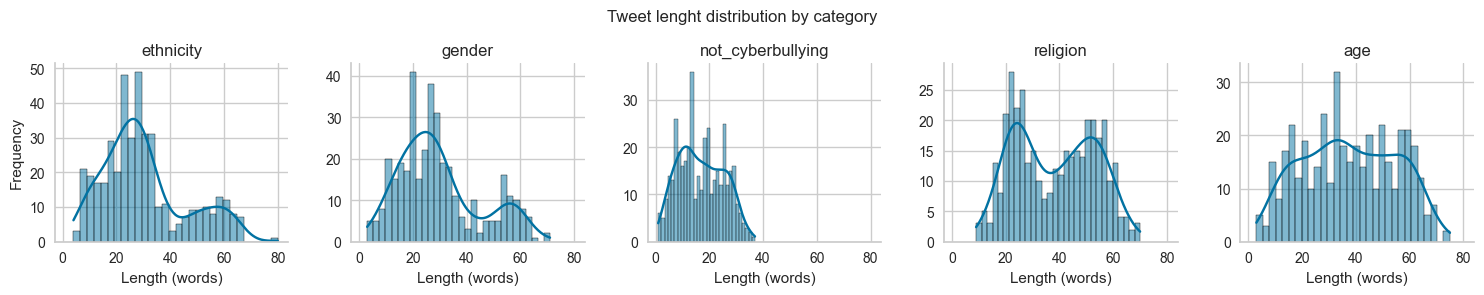

In [9]:
############## Exploratory plots (EDA)

# Tokenize the tweets and count the number of words
slice_df['word_count'] = slice_df['tweet_text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Create subplots for each category based on word count using histograms
g = sns.FacetGrid(slice_df, col='cyberbullying_type', col_wrap=len(category_colors), sharey=False)
g.map(sns.histplot, 'word_count', bins=30, kde=True, palette=category_colors)
g.set_titles('{col_name}', size= 12)

# Set y-axis label for each subplot
g.set_axis_labels("Length (words)", "Frequency")
# Adjust the layout to prevent overlap
g.fig.subplots_adjust(top=0.8)  # Increase top margin

g.fig.suptitle('Tweet lenght distribution by category', fontsize=12)
plt.show()


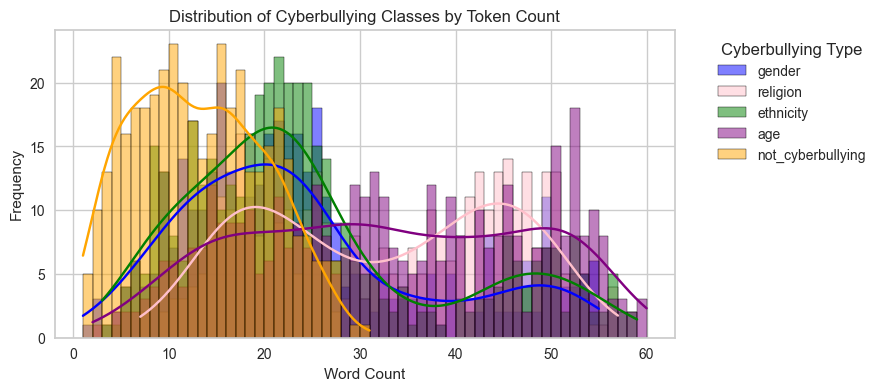

In [10]:
# Step 1: Calculate the number of tokens in each tweet
slice_df['word_count'] = slice_df['tweet_text'].apply(lambda x: len(x.split()))

# Step 2: Plot the distribution with custom colors and overlaying histograms
plt.figure(figsize=(8, 4))

for col, color in category_colors.items():
    sns.histplot(data=slice_df[slice_df['cyberbullying_type'] == col], x='word_count', stat='count',
                 kde=True, label=col, color=color, alpha=0.5, binwidth=1)  # Adjust binwidth for thinner bars

plt.title('Distribution of Cyberbullying Classes by Token Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(title='Cyberbullying Type', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()

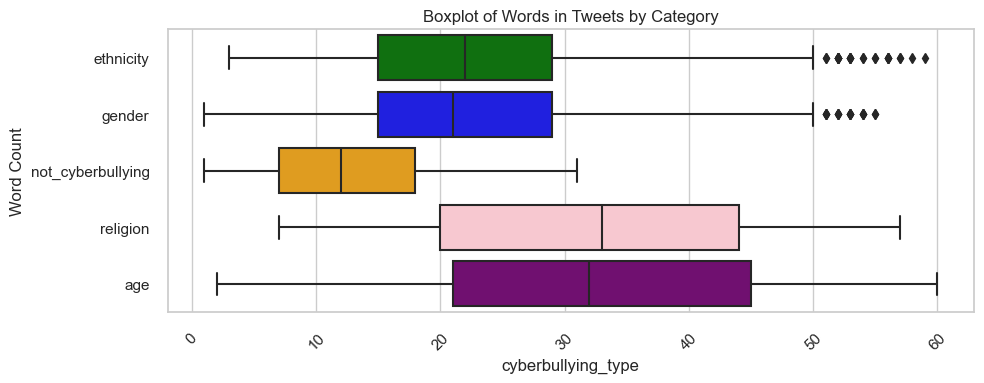

In [11]:
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.set(style="whitegrid")  # Set the style for the plot

# Create a boxplot
sns.boxplot(x='word_count', y='cyberbullying_type', data=slice_df, palette=category_colors)
# Customize the plot
plt.title('Boxplot of Words in Tweets by Category')
plt.xlabel('cyberbullying_type')
plt.ylabel('Word Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility


# Show the plot
plt.tight_layout()
plt.show()

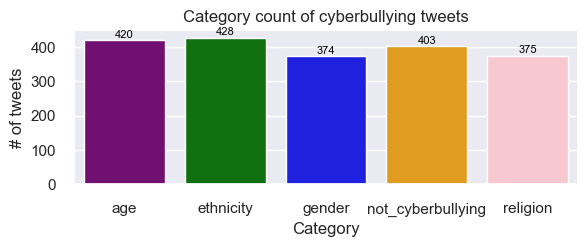

In [12]:
sns.set_style("darkgrid")  # Setting the background to a gray grid style
sns.set_context("notebook")  # Setting the context to a notebook style

# Plot the category distribution with custom colors using Seaborn
plot_data = slice_df['cyberbullying_type'].value_counts().sort_index()
plt.figure(figsize=(6.5, 2))

# Plotting with Seaborn
ax = sns.barplot(x=plot_data.index, y=plot_data, palette=[category_colors.get(x, 'gray') for x in plot_data.index])
plt.title('Category count of cyberbullying tweets', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.ylabel('# of tweets', fontsize=12)

# Add annotations for each bar
for i, val in enumerate(plot_data):
    ax.text(i, val + 8, str(val), color='black', ha='center', fontsize = 8)

plt.show()


## Text cleaning 
Tweets are short sentences but include a lot of special characters, line skips and emojis, we remove all to 

In [13]:
# Define a stemmer for stemming words.
stemmer = PorterStemmer()
# Define a lemmatizer for lemmatizing words.
lemmatizer = WordNetLemmatizer()
# Define regex pattern for matching emojis.
EMOJI_PATTERN = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+",
    flags=re.UNICODE)


def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'  # In case language detection fails

# Function to map NLTK's part of speech tags to WordNet's part of speech tags.
# This is used in lemmatization to obtain the lemma of a word based on its part of speech.
def get_wordnet_pos(tag):
    """
    Convert the part-of-speech naming scheme from the Penn Treebank tags to WordNet's format.
    
    :param tag: The part-of-speech tag obtained from NLTK's part-of-speech tagger.
    :return: A character that represents the corresponding WordNet part of speech.
    """
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return NOUN
    

# Function to preprocess text by tokenizing, removing stopwords, stemming, and lemmatizing.
def preprocess_text(text, remove_stopwords=True, use_stemming=False, use_lemmatization=False):
    """
    Preprocess a given text using tokenization, stopwords removal, stemming, and lemmatization.
    
    :param text: The text to preprocess.
    :param remove_stopwords: If True, stopwords are removed from the text.
    :param use_stemming: If True, words are reduced to their stem form.
    :param use_lemmatization: If True, words are reduced to their base or dictionary form.
    :return: The preprocessed text as a string.
    """
    
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    
    # Tokenize text using NLTK's word_tokenize function.
    tokens = word_tokenize(text)

    # Remove stopwords if the corresponding option is enabled.
    if remove_stopwords:
        tokens = [w for w in tokens if not w.lower() in stopwords.words('english')]

    # Apply stemming if the corresponding option is enabled.
    if use_stemming:
        tokens = [stemmer.stem(token) for token in tokens]

    # Apply lemmatization if the corresponding option is enabled.
    if use_lemmatization:
        pos_tags = nltk.pos_tag(tokens)
        tokens = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(pos)) for token, pos in pos_tags]

    # Rejoin tokens into a single string.
    text = ' '.join(tokens)
    return text

# Function to clean tweets by removing URLs, mentions, hashtags, and non-ASCII characters.
def clean_tweet(tweet, remove_stopwords=True, use_stemming=False, use_lemmatization=True):
    """
    Clean the tweet by removing URLs, mentions, hashtags, non-ASCII characters,
    and applying text preprocessing (tokenization, stopwords removal, stemming, lemmatization).
    
    :param tweet: The original tweet text.
    :param remove_stopwords: If True, stopwords are removed from the text.
    :param use_stemming: If True, words are reduced to their stem form.
    :param use_lemmatization: If True, words are reduced to their base or dictionary form.
    :return: The cleaned tweet text.
    """
    # Remove URLs, mentions, and hashtags from the tweet.
    tweet = re.sub(r'(#\w+)|(@\w+)|(\w+:\/\/\S+)', '', tweet)
    # Remove non-ASCII characters from the tweet.
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)
    # Preprocess the tweet text.
    tweet = preprocess_text(tweet, remove_stopwords, use_stemming, use_lemmatization)
    return tweet


# Function that combines cleaning tweets with extracting features such as hashtags, mentions, emojis, and language.
def preprocess_tweet(tweet):
    """
    Preprocess the tweet by extracting certain features and then cleaning the text.
    
    :param tweet: The original tweet text.
    :return: A tuple containing the cleaned tweet text and a dictionary of extracted features.
    """
    # Extract features from the tweet.
    features = {
        'hashtags': re.findall(r'#\w+', tweet),  # Find all hashtags.
        'mentions': re.findall(r'@\w+', tweet),  # Find all mentions.
        'emojis': EMOJI_PATTERN.findall(tweet),  # Extract emojis using the defined regex pattern.
        'language': detect_language(tweet)       # Detect language using the placeholder function.
    }

    # Clean the tweet using the clean_tweet function.
    cleaned_tweet = clean_tweet(tweet)
    
    # Return both the cleaned tweet and the extracted features.
    return cleaned_tweet, features



#########################

tqdm.pandas()
# Apply preprocessing to the tweets and time the process.
t1 = time.time()
print('Starting cleaning of data')

# Use tqdm to show progress bar as we apply preprocess_tweet function to each tweet in the DataFrame.
slice_df['cleaned'], slice_df['features'] = zip(*slice_df['tweet_text'].progress_apply(preprocess_tweet))
    
print('Finished cleaning of data')
t2 = time.time()
print(f'Elapsed time for preprocessing: {t2-t1:.2f}s')

# Extract the features from the features column into separate columns in the DataFrame.
slice_df['hashtags'] = slice_df['features'].apply(lambda x: x['hashtags'])
slice_df['mentions'] = slice_df['features'].apply(lambda x: x['mentions'])
# Add code to extract emojis and language if you have that functionality.
slice_df['emojis'] = slice_df['features'].apply(lambda x: x['emojis'])
slice_df['language'] = slice_df['features'].apply(lambda x: x['language'])

# Drop the 'features' column from the DataFrame as it's no longer needed.
slice_df.drop(columns=['features'], inplace=True)
# %%
# First, we define a function that combines all the features into a single string.
def combine_features(row):
    # Combine the cleaned text with hashtags, mentions, and emojis separated by spaces.
    # The space (' ') separator is important to ensure each token is treated separately in the vectorization.
    return ' '.join(row['hashtags']) + ' ' + ' '.join(row['mentions']) + ' ' + ' '.join(row['emojis']) + ' ' + row['cleaned']

# Now, apply the combine_features function to each row in the DataFrame to create a new 'combined_features' column.
# We use axis=1 to indicate that the function should be applied to each row.
slice_df['combined_features'] = slice_df.apply(combine_features, axis=1)

Starting cleaning of data


  0%|          | 0/2000 [00:00<?, ?it/s]100%|██████████| 2000/2000 [00:25<00:00, 79.52it/s] 

Finished cleaning of data
Elapsed time for preprocessing: 25.19s


In [14]:
slice_df.head(2)

index                                         tweet_text  \
0  40207  I couldn't give two fuck on what niggers think...   
1  13098                           @Dreysander1 Absolutely.   

  cyberbullying_type  word_count  \
0          ethnicity          15   
1             gender           2   

                                             cleaned hashtags        mentions  \
0  give two fuck nigger think still get bandoe du...       []              []   
1                                         Absolutely       []  [@Dreysander1]   

  emojis language                                  combined_features  
0     []       en     give two fuck nigger think still get bandoe...  
1     []       de                           @Dreysander1  Absolutely

In [15]:
# Example of cleaned tweet
print(slice_df['tweet_text'][200])
print(slice_df['cleaned'][200])
print(slice_df['combined_features'][200])

@alihadi68 @David_Cameron Who's them? I only see real beheadings in Palestine and the rest of the Muslim world.
see real beheading Palestine rest Muslim world
 @alihadi68 @David_Cameron  see real beheading Palestine rest Muslim world


## Vectorization

In [16]:
# We'll reinitialize the TfidfVectorizer with the same parameters as before.
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=0.01, max_df=0.85)
# We fit_transform the vectorizer to the 'combined_features' column to create the feature matrix.
X_text = vectorizer.fit_transform(slice_df['combined_features'])
# We can check the shape of the new feature matrix to understand the size of our dataset now.
X_text.shape

(2000, 192)

## PCA and T-SNE (Dimensionality Reduction)

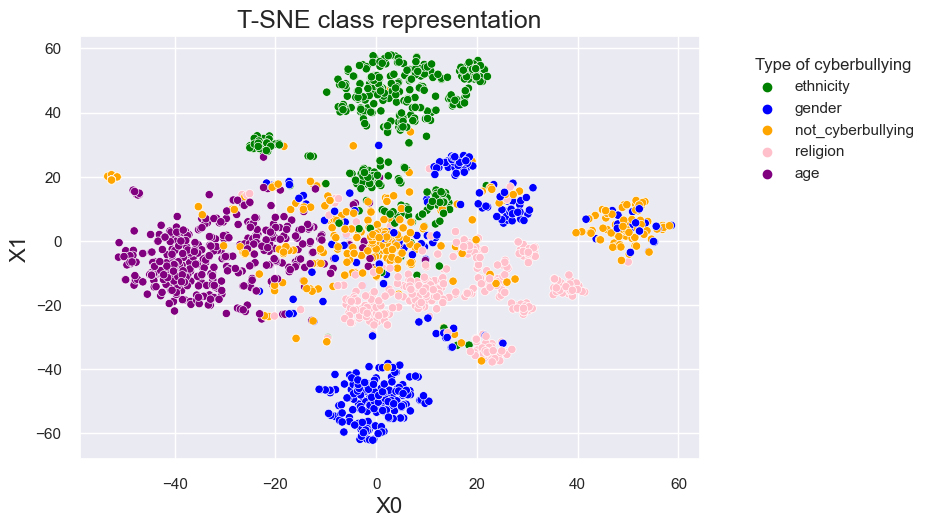

In [17]:
# Reduce the dimensionality of data points to plot the datapoint distribution
pca = PCA(n_components=50, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X_text.toarray())
X_embedded = TSNE(n_components=2, learning_rate="auto", init="random").fit_transform(pca_vecs)
                  

plt.title("T-SNE class representation", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=slice_df,
                x=X_embedded[:, 0],
                y=X_embedded[:, 1],
                hue='cyberbullying_type',
                palette=category_colors)
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=1,
           title='Type of cyberbullying')
plt.show()

In [18]:
# Interactive plot to read tweets from each of the clusters/ categories

# Set the desired height and width for the plot
height = 800
width = 800

fig = px.scatter(slice_df, x=X_embedded[:, 0], y=X_embedded[:, 1], color='cyberbullying_type', color_discrete_map=category_colors, title="T-SNE class representation", hover_data=['tweet_text'])
fig.update_xaxes(title_text="X0")
fig.update_yaxes(title_text="X1")
fig.update_layout(legend_title="Type of cyberbullying")

fig.show()


In [19]:
def get_top_keywords(X, clusters, vectorizer, n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    dff = pd.DataFrame(X.todense()).groupby(clusters).mean()  # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out()  # access tf-idf terms
    for i, r in dff.iterrows():
        print('\nCluster {}'.format(i))
         # for each row of the dataframe, find the n terms that have the highest tf idf score
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 

In [20]:
print('The most central words for each category')
get_top_keywords(X_text, slice_df['cyberbullying_type'], vectorizer, 10)

The most central words for each category

Cluster age
im,go,middle,one,get,like,girl,high,bully,school

Cluster ethnicity
tayyoung_,rt,ur,obama,white,black,as,dumb,nigger,fuck

Cluster gender
like,sexist,female,call,bitch,make,rt,gay,rape,joke

Cluster not_cyberbullying
people,know,see,kat,like,go,get,rt,bully,mkr

Cluster religion
like,terrorist,terrorism,woman,right,christian,islam,muslims,muslim,idiot


# Unsupervised Learning - Clustering 🔍

## Method  1: K-Means Clustering

In [21]:
class KMeans:

    def __init__(self, n_clusters, max_iter=300, random_state=1312):
        """
        Parameters
        ----------
        n_clusters : INT
            Number of clusters for K-means
        max_iter : INT, optional
            Number of iterations run by K-means. The default is 300.
        random_state : INT, optional
            Random state for initilization. Used for replication.

        Returns
        -------
        None.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initCentroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def getCentroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def getDist(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1) #default is frobenius norm, which is equivilant to 2-norm for vectors
            distance[:, k] = np.square(row_norm)
        return distance
    
    def fit(self, X):
        self.centroids = self.initCentroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.getDist(X, old_centroids)
            self.labels = np.argmin(distance, axis=1)
            self.centroids = self.getCentroids(X, self.labels)
            if np.all(old_centroids == self.centroids): #If no updates are done
                break

    def predict(self, X):
        distance = self.getDist(X, self.centroids)
        return np.argmin(distance,axis=1)

In [22]:
### Using own K-means model
kmeans = KMeans(n_clusters=5, max_iter=300, random_state=42)
# fit the model
kmeans.fit(X_text.toarray())
# store cluster labels in a variable
clusters_kmeans = kmeans.predict(X_text.toarray())

print(clusters_kmeans.shape)
#add a column with clusters assigned by kmeans
slice_df['cluster_kmeans_own'] = clusters_kmeans

(2000,)


In [23]:
#### Using Sklearn kmeans 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_text.toarray())
slice_df['cluster_kmeans'] = kmeans.labels_

In [24]:
print('The most central words for each category')
get_top_keywords(X_text, kmeans.labels_, vectorizer, 10)

The most central words for each category

Cluster 0
go,im,middle,one,like,get,girl,high,school,bully

Cluster 1
think,men,like,say,funny,people,make,rape,gay,joke

Cluster 2
say,right,islam,people,call,muslims,woman,muslim,idiot,like

Cluster 3
know,people,amp,girl,get,sexist,go,kat,rt,mkr

Cluster 4
stupid,shit,bitch,rt,tayyoung_,obama,as,nigger,dumb,fuck


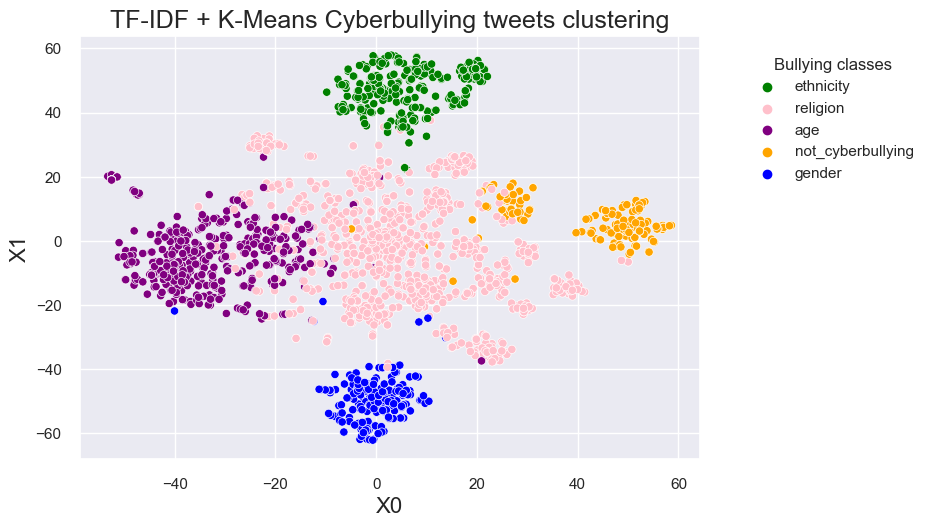

In [25]:
cluster_map_kmeans = {
    0: "age",
    1: "gender",
    2: "religion",
    3: "not_cyberbullying",
    4: "ethnicity"
}
# apply mapping
slice_df['cluster_mapped_kmeans'] = slice_df['cluster_kmeans'].map(cluster_map_kmeans)

plt.title("TF-IDF + K-Means Cyberbullying tweets clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=slice_df,
                x=X_embedded[:, 0],
                y=X_embedded[:, 1],
                hue='cluster_mapped_kmeans',
                palette=category_colors)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=1,
           title='Bullying classes')

plt.show()


In [26]:
slice_df.head(2)

index                                         tweet_text  \
0  40207  I couldn't give two fuck on what niggers think...   
1  13098                           @Dreysander1 Absolutely.   

  cyberbullying_type  word_count  \
0          ethnicity          15   
1             gender           2   

                                             cleaned hashtags        mentions  \
0  give two fuck nigger think still get bandoe du...       []              []   
1                                         Absolutely       []  [@Dreysander1]   

  emojis language                                  combined_features  \
0     []       en     give two fuck nigger think still get bandoe...   
1     []       de                           @Dreysander1  Absolutely   

   cluster_kmeans_own  cluster_kmeans cluster_mapped_kmeans  
0                   0               4             ethnicity  
1                   2               2              religion

It does an OK job. Only not_cyberbulling is absorbed highly by the religion category. We will evaluate the misclassifications on an upcoming section.


## Method 2: Spectral Clustering

In [27]:
# Initialize SpectralClustering
n_clusters = 5
gamma_value = 1
#spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='rbf', gamma=gamma_value)

# Fit the model to the TF-IDF features
spectral_cluster_labels = spectral.fit(X_text)

# Retrieve the cluster labels
clusters_spectral = spectral.labels_

# Add the cluster labels to your DataFrame
slice_df['cluster_spectral'] = clusters_spectral

In [28]:
print('The most central words for each category')
get_top_keywords(X_text, spectral.labels_, vectorizer, 10)

The most central words for each category

Cluster 0
say,muslims,people,call,muslim,woman,idiot,like,rt,mkr

Cluster 1
get,shit,bitch,rt,tayyoung_,obama,as,nigger,dumb,fuck

Cluster 2
ok,men,like,say,funny,people,make,rape,gay,joke

Cluster 3
go,im,middle,one,like,get,girl,high,bully,school

Cluster 4
humanity,idiot,im,isis,islam,hate,youre,problem,school,bully


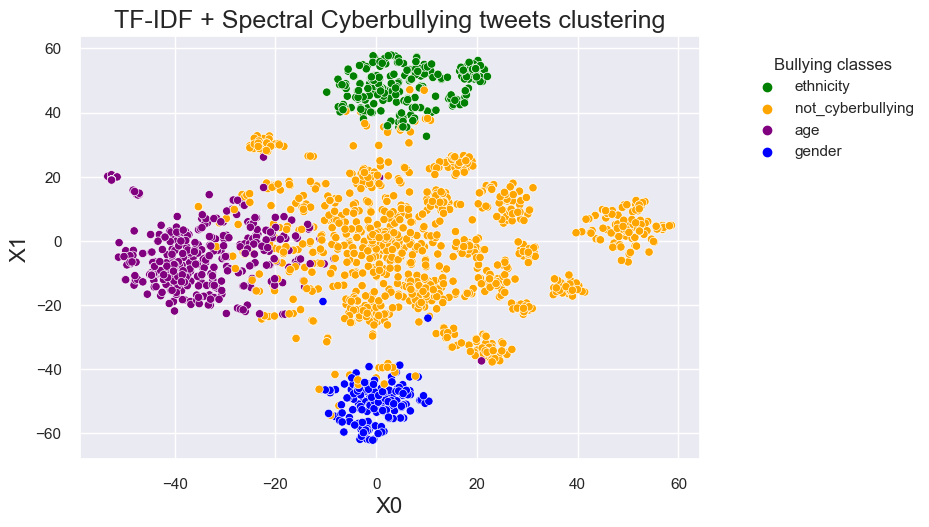

In [29]:
#cluster_map_spectral = {
#    0: "age",
#    1: "religion",
#    2: "ethnicity",
#    3: "gender",
#    4: "not_cyberbullying"
#}

cluster_map_spectral = {
    0: "not_cyberbullying",
    1: "ethnicity",
    2: "gender",
    3: "age",
    4: "age"
}
# apply mapping
slice_df['cluster_mapped_spectral'] = slice_df['cluster_spectral'].map(cluster_map_spectral)

plt.title("TF-IDF + Spectral Cyberbullying tweets clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=slice_df,
                x=X_embedded[:, 0],
                y=X_embedded[:, 1],
                hue='cluster_mapped_spectral',
                palette=category_colors)
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=1,
           title='Bullying classes')
plt.show()

## Method 3: Agglomerative Clustering

Text(0.5, 1.0, 'Dataset dendrogram')

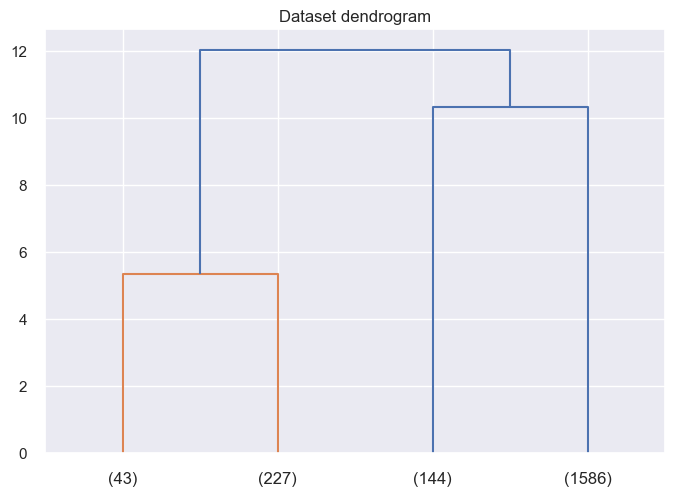

In [30]:
dendro = hierarchy.dendrogram(hierarchy.linkage(X_text.toarray(), method='ward'), truncate_mode='level',p=1)
plt.title('Dataset dendrogram')

In [31]:
# We cannot use truncated SVD because we loose way to much information. And the clustering would be shit.

######### Evaluate the optimal number of clusters by silhouette score ########
range_n_clusters = list(range(2, 10))  # Example range from 2 to 9
best_score = -1
best_n_clusters = 0

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_text.toarray())
    score = silhouette_score(X_text.toarray(), preds)

    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters


print(f'The number of optimal clusters for agglomerative clustering according to the silhouette score is {best_n_clusters} ')
print("We force it to be 5, just to compare against the other methods")

n_clusters_force= 5
# Final model with the optimal number of clusters
final_agglomerative = AgglomerativeClustering(n_clusters=n_clusters_force, affinity='euclidean',linkage='ward')
final_clusters_agglo = final_agglomerative.fit_predict(X_text.toarray())
slice_df['cluster_agglo'] = final_clusters_agglo

The number of optimal clusters for agglomerative clustering according to the silhouette score is 4 
We force it to be 5, just to compare against the other methods


In [32]:
slice_df.head(2)

index                                         tweet_text  \
0  40207  I couldn't give two fuck on what niggers think...   
1  13098                           @Dreysander1 Absolutely.   

  cyberbullying_type  word_count  \
0          ethnicity          15   
1             gender           2   

                                             cleaned hashtags        mentions  \
0  give two fuck nigger think still get bandoe du...       []              []   
1                                         Absolutely       []  [@Dreysander1]   

  emojis language                                  combined_features  \
0     []       en     give two fuck nigger think still get bandoe...   
1     []       de                           @Dreysander1  Absolutely   

   cluster_kmeans_own  cluster_kmeans cluster_mapped_kmeans  cluster_spectral  \
0                   0               4             ethnicity                 1   
1                   2               2              religion                 0   

  cluster_mapped_spectral  cluster_agglo  
0               ethnicity              1  
1       not_cyberbullying              0

In [33]:
get_top_keywords(X_text, final_clusters_agglo, vectorizer, 10)


Cluster 0
go,people,call,get,muslim,idiot,like,woman,rt,mkr

Cluster 1
bitch,stupid,shit,rt,tayyoung_,obama,as,nigger,dumb,fuck

Cluster 2
guy,say,people,like,men,funny,make,rape,gay,joke

Cluster 3
people,say,one,know,get,like,girl,high,bully,school

Cluster 4
high,humanity,idiot,im,isis,islam,hate,youre,school,bully


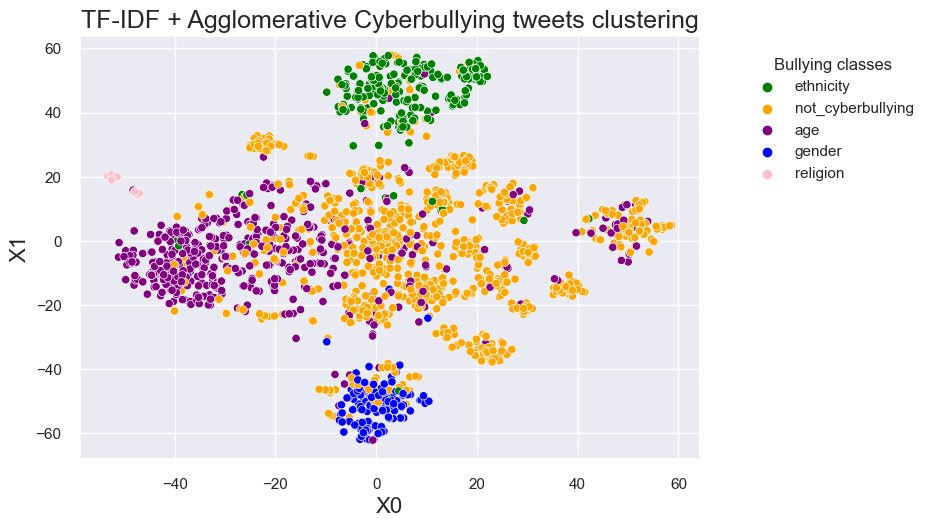

In [34]:
cluster_map_agglo = {
    0: "not_cyberbullying",
    1: "ethnicity",
    2: "gender",
    3: "age",
    4: "religion"
}
# apply mapping
slice_df['cluster_mapped_agglomerative'] = slice_df['cluster_agglo'].map(cluster_map_agglo)

plt.title("TF-IDF + Agglomerative Cyberbullying tweets clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=slice_df,
                x=X_embedded[:, 0],
                y=X_embedded[:, 1],
                hue='cluster_mapped_agglomerative',
                palette=category_colors)
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=1,
           title='Bullying classes')
plt.show()

In [35]:
slice_df.head(1)

index                                         tweet_text  \
0  40207  I couldn't give two fuck on what niggers think...   

  cyberbullying_type  word_count  \
0          ethnicity          15   

                                             cleaned hashtags mentions emojis  \
0  give two fuck nigger think still get bandoe du...       []       []     []   

  language                                  combined_features  \
0       en     give two fuck nigger think still get bandoe...   

   cluster_kmeans_own  cluster_kmeans cluster_mapped_kmeans  cluster_spectral  \
0                   0               4             ethnicity                 1   

  cluster_mapped_spectral  cluster_agglo cluster_mapped_agglomerative  
0               ethnicity              1                    ethnicity

## All plots together

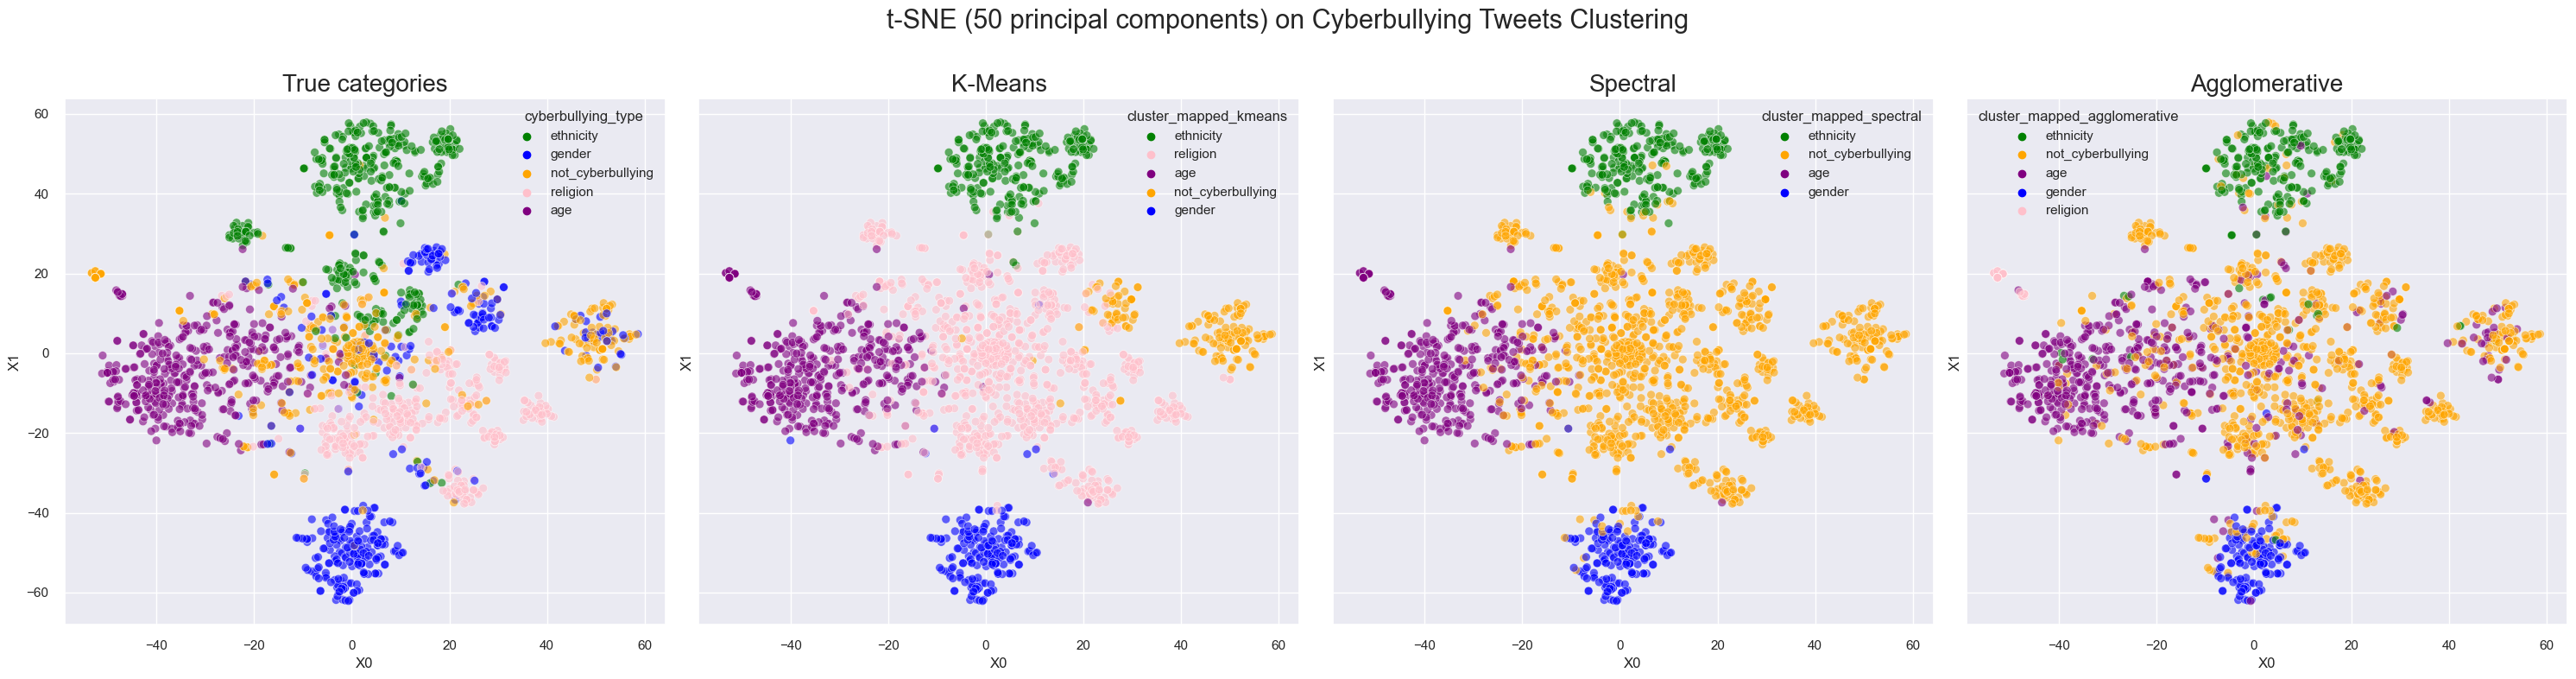

In [49]:
# All plots together

# Assuming you have t-SNE features stored in 'tsne-2d-one' and 'tsne-2d-two' columns.
# If not, you need to create these columns from your t-SNE embedding:
slice_df['tsne-2d-one'] = X_embedded[:, 0]
slice_df['tsne-2d-two'] = X_embedded[:, 1]


def plot_tnse_clusters_one_line(slice_df, method_names, cluster_mappings, X_embedded):
    fig, axes = plt.subplots(1, 4, figsize=(30, 8), sharex=True, sharey=True)
    fig.suptitle("t-SNE (50 principal components) on Cyberbullying Tweets Clustering", fontsize=22)

    for i, (method_name, cluster_mapping) in enumerate(zip(method_names, cluster_mappings)):
        ax = axes[i]
        ax.set_title(f"{method_name}", fontsize=20)
        ax.set_xlabel("X0", fontsize=12)
        ax.set_ylabel("X1", fontsize=12)


        sns.scatterplot(
            x=X_embedded[:, 0],
            y=X_embedded[:, 1],
            hue=slice_df[cluster_mapping],
            palette=category_colors,  # Using the distinct color palette
            alpha=0.6,
            edgecolor='w',
            linewidth=0.5,
            s=50,
            ax=ax,
            legend=True  # Suppress individual legends in subplots
        )
        #ax.legend(fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


# Usage
method_names = ["True categories", 'K-Means', 'Spectral', 'Agglomerative']
cluster_mappings = ['cyberbullying_type','cluster_mapped_kmeans', 'cluster_mapped_spectral', 'cluster_mapped_agglomerative']

# Create a custom legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(method_names), fontsize=16)

plot_tnse_clusters_one_line(slice_df, method_names, cluster_mappings, X_embedded)


## Analysis of misclasified points ⚖️


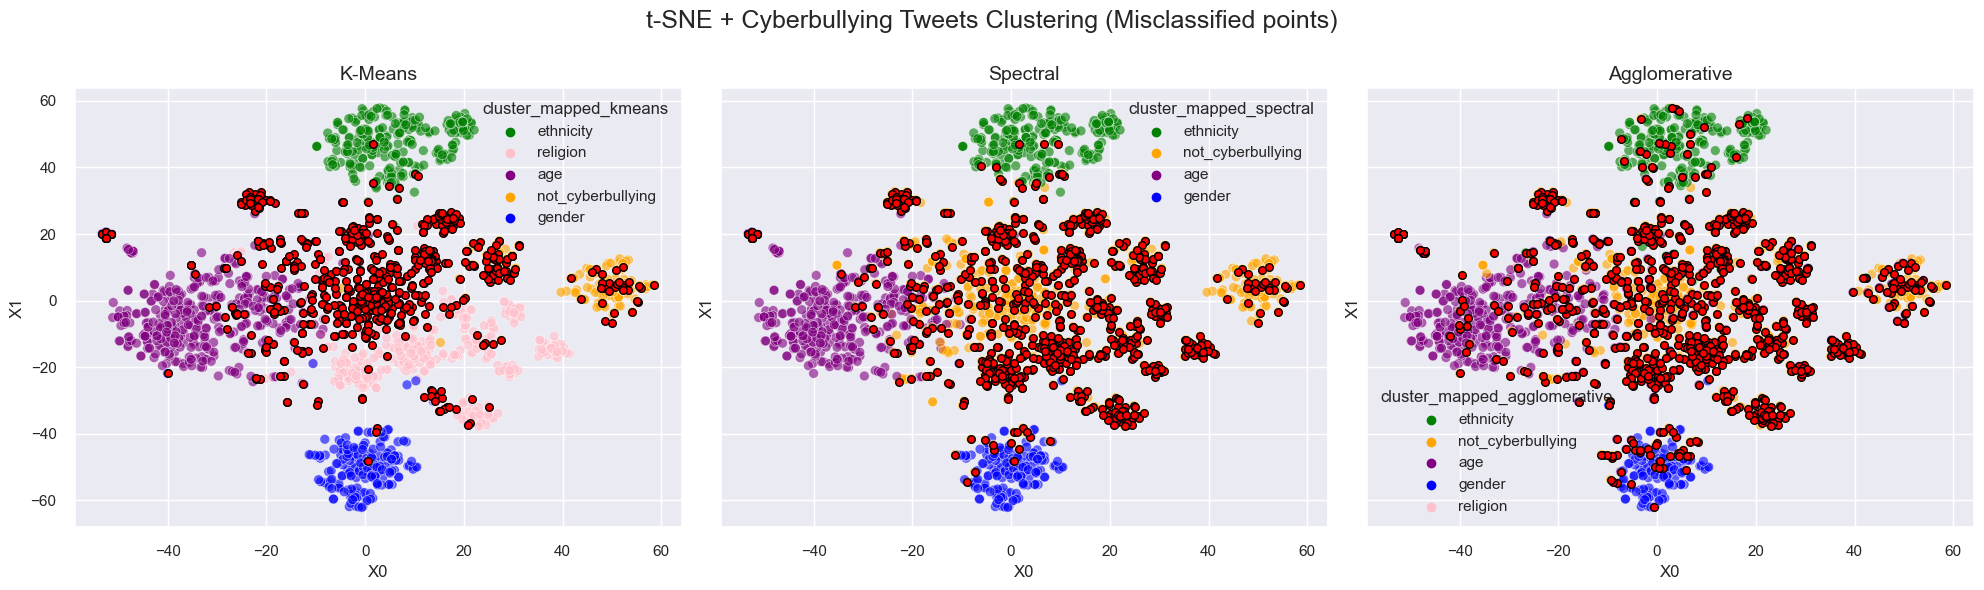

In [50]:
# Find misclassified indexes for KMeans
misclassified_kmeans = slice_df[slice_df['cyberbullying_type'] != slice_df['cluster_mapped_kmeans']]

# Find misclassified indexes for Spectral
misclassified_spectral = slice_df[slice_df['cyberbullying_type'] != slice_df['cluster_mapped_spectral']]

# Find misclassified indexes for Agglomerative
misclassified_agglo = slice_df[slice_df['cyberbullying_type'] != slice_df['cluster_mapped_agglomerative']]

def plot_tnse_clusters_with_misclassified(slice_df, method_names, cluster_mappings, X_embedded):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)
    fig.suptitle("t-SNE + Cyberbullying Tweets Clustering (Misclassified points)", fontsize=18)

    misclassified_points = [misclassified_kmeans, misclassified_spectral, misclassified_agglo]

    for i, (method_name, cluster_mapping, misclassified) in enumerate(zip(method_names, cluster_mappings, misclassified_points)):
        ax = axes[i]
        ax.set_title(f"{method_name}", fontsize=14)
        ax.set_xlabel("X0", fontsize=12)
        ax.set_ylabel("X1", fontsize=12)

        # Plot all points
        sns.scatterplot(
            x=X_embedded[:, 0],
            y=X_embedded[:, 1],
            hue=slice_df[cluster_mapping],
            palette=category_colors,
            alpha=0.6,
            edgecolor='w',
            linewidth=0.5,
            s=50,
            ax=ax,
            legend=True
        )

        # Plot misclassified points with a red circle
        ax.scatter(
            misclassified['tsne-2d-one'],
            misclassified['tsne-2d-two'],
            s=30,  # Larger size for distinct visibility
            c='red',
            edgecolor='black',  # Black border around red circle
            label='Misclassified'
        )

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Usage
method_names = ['K-Means', 'Spectral', 'Agglomerative']
cluster_mappings = ['cluster_mapped_kmeans', 'cluster_mapped_spectral', 'cluster_mapped_agglomerative']

plot_tnse_clusters_with_misclassified(slice_df, method_names, cluster_mappings, X_embedded)


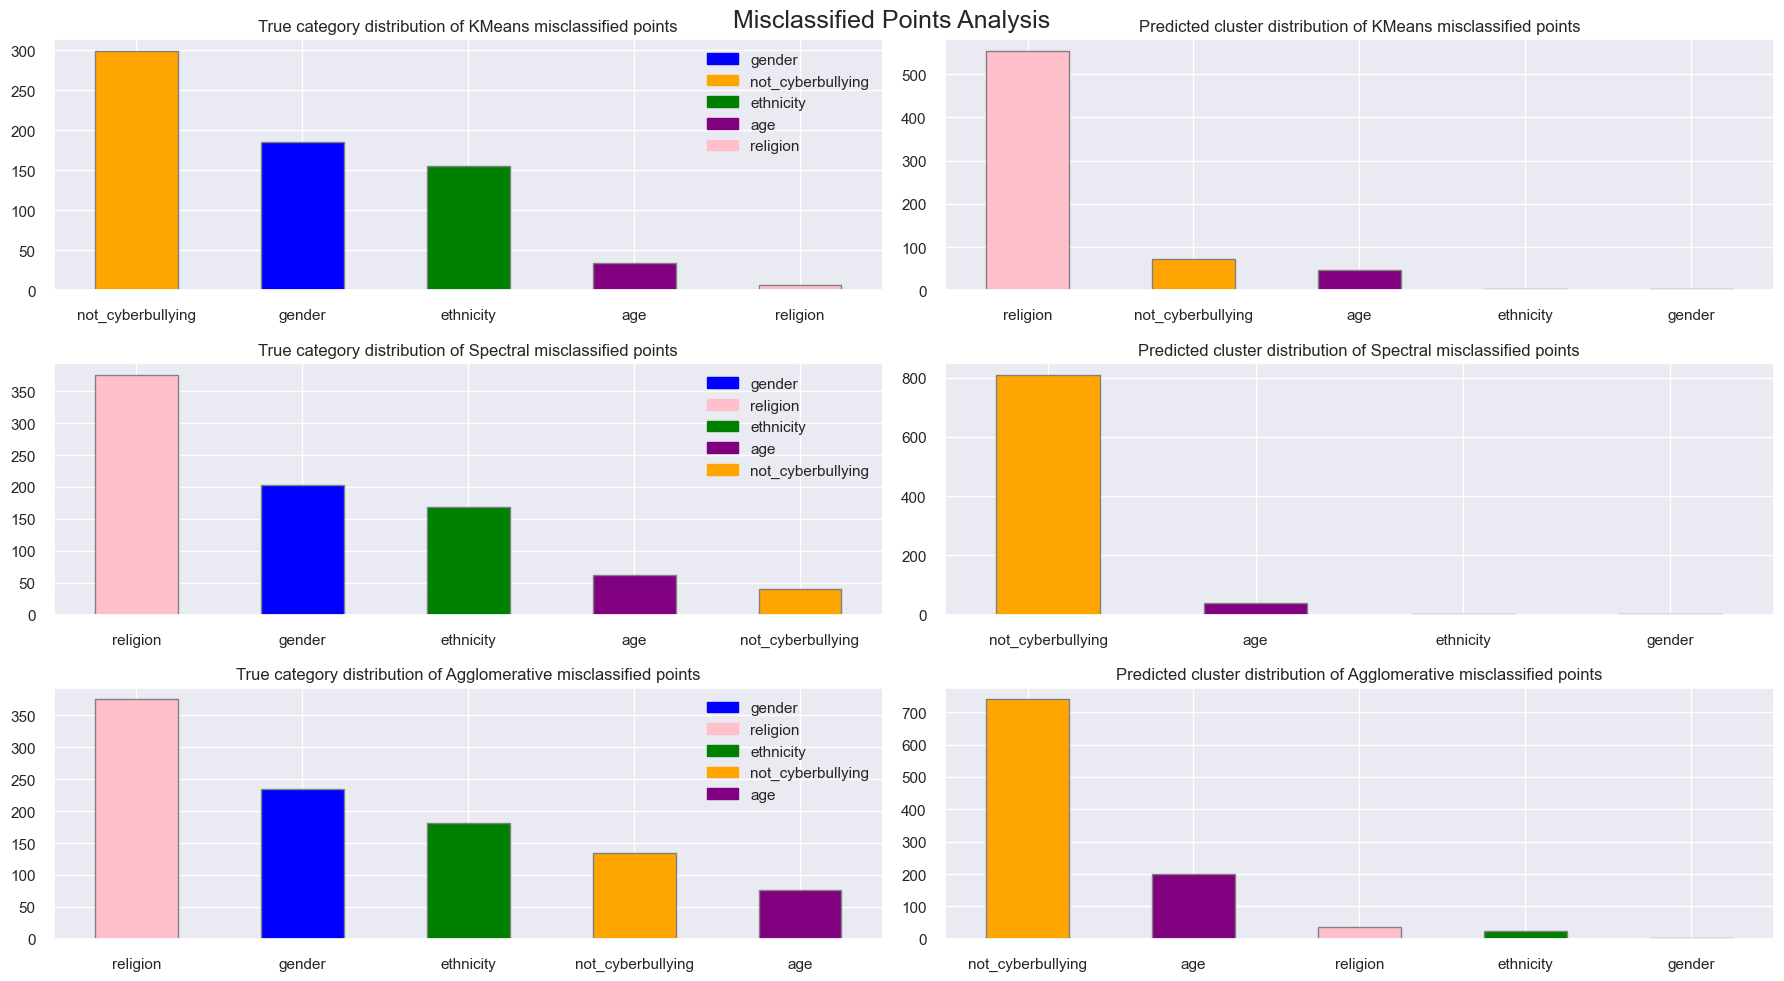

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
fig.suptitle('Misclassified Points Analysis', fontsize=18)

misclassified_points = [misclassified_kmeans, misclassified_spectral, misclassified_agglo]

for i, (misclassified, method_name) in enumerate(zip(misclassified_points, ['KMeans', 'Spectral', 'Agglomerative'])):
    # Distribution of misclassified points - true category
    misclassified['cyberbullying_type'].value_counts().plot(ax=axes[i, 0],
                                       kind='bar',
                                       rot=0,
                                       color=[category_colors[label] for label in misclassified['cyberbullying_type'].value_counts().index],
                                       edgecolor=["gray"],
                                       title=f'True category distribution of {method_name} misclassified points')

    # Distribution of misclassified points - predicted cluster
    misclassified['cluster_mapped_' + method_name.lower()].value_counts().plot(ax=axes[i, 1],
                                       kind='bar',
                                       rot=0,
                                       color=[category_colors[label] for label in misclassified['cluster_mapped_' + method_name.lower()].value_counts().index],
                                       edgecolor=["gray"],
                                       title=f'Predicted cluster distribution of {method_name} misclassified points')
    
    # Apply legend for the true category plot
    handles = [plt.Rectangle((0, 0), 1, 1, color=category_colors[label]) for label in misclassified['cyberbullying_type'].unique()]
    axes[i, 0].legend(handles, misclassified['cyberbullying_type'].unique(), loc='best')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


## Davies Boulding Index + Accuracy for clustering methods

In [52]:
def calculate_cluster_metrics(true_labels, predicted_labels_list, method_names, metric_names):
    metric_scores = {metric: {} for metric in metric_names}
    
    for method, labels in zip(method_names, predicted_labels_list):
        for metric in metric_names:
            if metric == 'homogeneity':
                score = homogeneity_score(true_labels, labels)
            elif metric == 'completeness':
                score = completeness_score(true_labels, labels)
            elif metric == 'v_measure':
                score = v_measure_score(true_labels, labels)
            elif metric == 'davies_bouldin':
                score = davies_bouldin_score(X_text.toarray(), labels)
            else:
                score = None
            
            metric_scores[metric][method] = round(score, 2) if score is not None else None
    
    return metric_scores

# Usage
true_labels = slice_df['cyberbullying_type']
predicted_labels_list = [
    slice_df['cluster_mapped_kmeans'],
    slice_df['cluster_mapped_agglomerative'],
    slice_df['cluster_mapped_spectral']
]

method_names = ['K-Means', 'Agglomerative', 'Spectral']

evaluation_metrics = ['homogeneity', 'completeness', 'v_measure', 'davies_bouldin']

scores = calculate_cluster_metrics(true_labels, predicted_labels_list, method_names, evaluation_metrics)

# Print the calculated metrics for each set of predicted labels
for method in method_names:
    print(f"\nMetrics for method: {method}")
    for metric, scores_dict in scores.items():
        score = scores_dict[method]
        print(f'{metric.capitalize()}: {score}')



Metrics for method: K-Means
Homogeneity: 0.5
Completeness: 0.57
V_measure: 0.53
Davies_bouldin: 3.51

Metrics for method: Agglomerative
Homogeneity: 0.3
Completeness: 0.39
V_measure: 0.34
Davies_bouldin: 3.97

Metrics for method: Spectral
Homogeneity: 0.42
Completeness: 0.61
V_measure: 0.5
Davies_bouldin: 3.28


In [53]:
# Find the correctly classified rows for K-Means
correct_list_kmeans = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_kmeans']].index.tolist()
# Filter to only include correctly classified rows for K-Means
correctly_classified_kmeans = slice_df.loc[correct_list_kmeans]

# Find the correctly classified rows for Spectral Clustering
correct_list_spectral = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_spectral']].index.tolist()
# Filter to only include correctly classified rows for Spectral Clustering
correctly_classified_spectral = slice_df.loc[correct_list_spectral]

# Find the correctly classified rows for Agglomerative Clustering
correct_list_agglo = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_agglomerative']].index.tolist()
# Filter to only include correctly classified rows for Agglomerative Clustering
correctly_classified_agglo = slice_df.loc[correct_list_agglo]

# Calculate the accuracy for both methods
accuracy_kmeans = len(correctly_classified_kmeans) / len(slice_df)
accuracy_spectral = len(correctly_classified_spectral) / len(slice_df)
accuracy_agglo = len(correctly_classified_agglo) / len(slice_df)
print(f'Accuracy of K-Means clustering: {accuracy_kmeans:.2%}')
print(f'Accuracy of Spectral clustering: {accuracy_spectral:.2%}')
print(f'Accuracy of Agglomerative Clustering: {accuracy_agglo:.2%}')

Accuracy of K-Means clustering: 66.05%
Accuracy of Spectral clustering: 57.55%
Accuracy of Agglomerative Clustering: 49.90%


## Automatic cluster mapping and analysis of missclassified points
- Until now, we are mapping the clusters to the true categories MANUALLY by using the 10 top words on each cluster.
- To automize this process:
    - We will calculate both the top words per true category and the top words per cluster for each of the clustering methods. 
    - And then assign each cluster the true category wiht the highest similarity.


### Mapping to true categories based on word similarity

In [54]:
slice_df.head(3)

index                                         tweet_text  \
0  40207  I couldn't give two fuck on what niggers think...   
1  13098                           @Dreysander1 Absolutely.   
2    655        Pq vc dorme tarde &gt;&gt;&gt;&gt; bullying   

  cyberbullying_type  word_count  \
0          ethnicity          15   
1             gender           2   
2  not_cyberbullying           6   

                                             cleaned hashtags        mentions  \
0  give two fuck nigger think still get bandoe du...       []              []   
1                                         Absolutely       []  [@Dreysander1]   
2             Pq vc dorme tarde gt gt gt gt bullying       []              []   

  emojis language                                  combined_features  \
0     []       en     give two fuck nigger think still get bandoe...   
1     []       de                           @Dreysander1  Absolutely   
2     []       nl             Pq vc dorme tarde gt gt gt gt bullying   

   cluster_kmeans_own  cluster_kmeans cluster_mapped_kmeans  cluster_spectral  \
0                   0               4             ethnicity                 1   
1                   2               2              religion                 0   
2                   2               2              religion                 0   

  cluster_mapped_spectral  cluster_agglo cluster_mapped_agglomerative  \
0               ethnicity              1                    ethnicity   
1       not_cyberbullying              0            not_cyberbullying   
2       not_cyberbullying              0            not_cyberbullying   

   tsne-2d-one  tsne-2d-two  
0    -2.632059    54.867954  
1    -1.955515    -0.442628  
2    -2.363943    -0.874628

In [55]:
slice_df = slice_df.drop(columns=["cluster_mapped_kmeans","cluster_mapped_agglomerative","cluster_mapped_spectral"])
slice_df.head()

index                                         tweet_text  \
0  40207  I couldn't give two fuck on what niggers think...   
1  13098                           @Dreysander1 Absolutely.   
2    655        Pq vc dorme tarde &gt;&gt;&gt;&gt; bullying   
3   5388  @Phum_Ngcobo eyi buti I'm struggling with dis ...   
4  20795  If you think that the actions of the followers...   

  cyberbullying_type  word_count  \
0          ethnicity          15   
1             gender           2   
2  not_cyberbullying           6   
3  not_cyberbullying          14   
4           religion          39   

                                             cleaned hashtags        mentions  \
0  give two fuck nigger think still get bandoe du...       []              []   
1                                         Absolutely       []  [@Dreysander1]   
2             Pq vc dorme tarde gt gt gt gt bullying       []              []   
3  eyi buti struggle dis twitter ting bbm cnt wat...       []  [@Phum_Ngcobo]   
4  think action follower religion represent Thrut...       []              []   

  emojis language                                  combined_features  \
0     []       en     give two fuck nigger think still get bandoe...   
1     []       de                           @Dreysander1  Absolutely   
2     []       nl             Pq vc dorme tarde gt gt gt gt bullying   
3     []       en   @Phum_Ngcobo  eyi buti struggle dis twitter t...   
4     []       en     think action follower religion represent Th...   

   cluster_kmeans_own  cluster_kmeans  cluster_spectral  cluster_agglo  \
0                   0               4                 1              1   
1                   2               2                 0              0   
2                   2               2                 0              0   
3                   2               2                 0              0   
4                   2               2                 0              0   

   tsne-2d-one  tsne-2d-two  
0    -2.632059    54.867954  
1    -1.955515    -0.442628  
2    -2.363943    -0.874628  
3    -1.002854     8.993087  
4     5.390708   -17.467054

In [56]:
def calculate_top_words_per_category(data, categories, vectorizer, n_words):
    top_words = {}
    for category in categories:
        # Filter data for each category
        category_data = data[data['cyberbullying_type'] == category]
        # Calculate TF-IDF and get top words
        tfidf_matrix = vectorizer.transform(category_data['cleaned'])
        sum_tfidf = np.sum(tfidf_matrix, axis=0)
        # If it's a sparse matrix, convert to a dense array
        if isinstance(sum_tfidf, np.matrix):
            sum_tfidf = sum_tfidf.A1
        sorted_indices = np.argsort(sum_tfidf)[::-1][:n_words]
        top_category_words = np.array(vectorizer.get_feature_names_out())[sorted_indices]
        top_words[category] = set(top_category_words.tolist())  # Convert array to list before creating a set
    return top_words

def calculate_top_words_per_cluster(X, clusters, vectorizer, n_words):
    top_cluster_words = {}
    for i in range(np.max(clusters) + 1):
        # Find the indices of rows in X that belong to the current cluster
        cluster_indices = np.where(clusters == i)
        # Sum the TF-IDF vectors for each word in the cluster
        sum_tfidf = np.sum(X[cluster_indices], axis=0)
        # Convert to a dense array if needed
        if isinstance(sum_tfidf, np.matrix):
            sum_tfidf = sum_tfidf.A1
        # Get the top word indices sorted by TF-IDF value
        top_indices = np.argsort(sum_tfidf)[::-1][:n_words]
        # Retrieve the top words
        top_words_list = np.array(vectorizer.get_feature_names_out())[top_indices]
        top_cluster_words[i] = set(top_words_list)
    return top_cluster_words

In [57]:
# Retrieve again all common words per category and cluster 
top_words_category = calculate_top_words_per_category(slice_df, slice_df['cyberbullying_type'].unique(), vectorizer, 20)
top_words_cluster_kmeans = calculate_top_words_per_cluster(X_text, slice_df['cluster_kmeans'], vectorizer, 20)
top_words_cluster_spectral = calculate_top_words_per_cluster(X_text, slice_df['cluster_spectral'], vectorizer, 20)
top_words_cluster_agglo = calculate_top_words_per_cluster(X_text, slice_df['cluster_agglo'], vectorizer, 20)

In [58]:
def match_clusters_to_categories(cluster_top_words, category_top_words, unique_categories):
    matches = {}
    used_categories = set()
    cluster_ids = list(cluster_top_words.keys())

    # Sort clusters by the sum of all their similarity scores to prioritize those with higher overall similarity
    cluster_ids.sort(key=lambda cid: sum(
        len(cluster_top_words[cid].intersection(category_top_words[cat])) / len(cluster_top_words[cid].union(category_top_words[cat]))
        for cat in category_top_words
    ), reverse=True)

    while cluster_ids:
        cluster_id = cluster_ids.pop(0)
        cluster_words = cluster_top_words[cluster_id]
        similarity_scores = {}

        # Calculate similarity scores for all categories against this cluster
        for category, category_words in category_top_words.items():
            intersection = cluster_words.intersection(category_words)
            union = cluster_words.union(category_words)
            jaccard_similarity = len(intersection) / len(union)
            similarity_scores[category] = jaccard_similarity

        # Sort categories by similarity score, prioritize unused categories
        sorted_categories = sorted(similarity_scores, key=lambda cat: (cat not in used_categories, similarity_scores[cat]), reverse=True)
        best_match_category = sorted_categories[0]
        matches[cluster_id] = best_match_category
        used_categories.add(best_match_category)

        # If all categories are used, allow reusing categories for remaining clusters
        if len(used_categories) == len(unique_categories):
            used_categories.clear()

    return matches

In [59]:
# Extract the unique categories from your data
unique_categories = np.unique(slice_df['cyberbullying_type'])    
matches_kmeans = match_clusters_to_categories(top_words_cluster_kmeans, top_words_category,unique_categories)
matches_spectral = match_clusters_to_categories(top_words_cluster_spectral, top_words_category,unique_categories)
matches_agglo = match_clusters_to_categories(top_words_cluster_agglo, top_words_category,unique_categories)


# Mapping dictionaries for K-Means and Spectral Clustering
cluster_map_kmeans = {cluster: category for cluster, category in matches_kmeans.items()}
cluster_map_spectral = {cluster: category for cluster, category in matches_spectral.items()}
cluster_map_agglo = {cluster: category for cluster, category in matches_agglo.items()}

print('Cluster mappings for kmeans:')
print(cluster_map_kmeans)

print('Cluster mappings for spectral:')
print(cluster_map_spectral)

print('Cluster mappings for Agglomerative:')
print(cluster_map_agglo)

# Apply the mappings
slice_df['cluster_mapped_kmeans'] = slice_df['cluster_kmeans'].map(cluster_map_kmeans)
slice_df['cluster_mapped_spectral'] = slice_df['cluster_spectral'].map(cluster_map_spectral)
slice_df['cluster_mapped_agglomerative'] = slice_df['cluster_agglo'].map(cluster_map_agglo)

Cluster mappings for kmeans:
{0: 'age', 2: 'ethnicity', 3: 'not_cyberbullying', 4: 'gender', 1: 'religion'}
Cluster mappings for spectral:
{3: 'age', 0: 'religion', 1: 'ethnicity', 2: 'gender', 4: 'not_cyberbullying'}
Cluster mappings for Agglomerative:
{3: 'age', 0: 'ethnicity', 1: 'gender', 2: 'religion', 4: 'not_cyberbullying'}


In [61]:
# Find the correctly classified rows for K-Means
correct_list_kmeans = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_kmeans']].index.tolist()
# Filter to only include correctly classified rows for K-Means
correctly_classified_kmeans = slice_df.loc[correct_list_kmeans]

# Find the correctly classified rows for Spectral Clustering
correct_list_spectral = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_spectral']].index.tolist()
# Filter to only include correctly classified rows for Spectral Clustering
correctly_classified_spectral = slice_df.loc[correct_list_spectral]

# Find the correctly classified rows for Agglomerative Clustering
correct_list_agglo = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_agglomerative']].index.tolist()
# Filter to only include correctly classified rows for Agglomerative Clustering
correctly_classified_agglo = slice_df.loc[correct_list_agglo]

# Calculate the accuracy for both methods
accuracy_kmeans = len(correctly_classified_kmeans) / len(slice_df)
accuracy_spectral = len(correctly_classified_spectral) / len(slice_df)
accuracy_agglo = len(correctly_classified_agglo) / len(slice_df)
print(f'Accuracy of K-Means clustering: {accuracy_kmeans:.2%}')
print(f'Accuracy of Spectral clustering: {accuracy_spectral:.2%}')
print(f'Accuracy of Agglomerative Clustering: {accuracy_agglo:.2%}')

Accuracy of K-Means clustering: 32.30%
Accuracy of Spectral clustering: 59.00%
Accuracy of Agglomerative Clustering: 27.10%


- This percentages are very low. Let's try to tray all combinations of mapping until we get the highest accuracy

In [62]:
## Aditional tests and checks to evaluate every combination of mapping for each method

def evaluate_mappings(true_labels, predicted_clusters, categories, num_samples=None):
    # Convert to lists for consistent indexing
    true_labels = list(true_labels)
    predicted_clusters = list(predicted_clusters)

    # Generate all unique clusters
    unique_clusters = sorted(set(predicted_clusters))

    # Generate permutations for the number of unique categories
    # and then product combinations if there are more clusters than categories
    if len(unique_clusters) <= len(categories):
        category_combinations = list(permutations(categories, len(unique_clusters)))
    else:
        # First, assign one category to each cluster
        base_permutations = list(permutations(categories))
        # Then, for the remaining clusters, allow categories to repeat
        additional_combinations = list(product(categories, repeat=len(unique_clusters) - len(categories)))
        # Combine the permutations with the additional combinations
        category_combinations = [perm + comb for perm in base_permutations for comb in additional_combinations]

    # If num_samples is specified and less than the total number of combinations, sample a subset
    if num_samples and num_samples < len(category_combinations):
        category_combinations = random.sample(category_combinations, num_samples)

    best_mapping = None
    best_accuracy = 0

    # Test each combination
    for category_comb in category_combinations:
        # Create a mapping for this combination
        mapping = {cluster: category for cluster, category in zip(unique_clusters, category_comb)}
        # Map the predicted clusters to categories using this mapping
        mapped_predictions = [mapping.get(cluster, None) for cluster in predicted_clusters]
        # Calculate the accuracy of this mapping
        accuracy = sum(1 for i, prediction in enumerate(mapped_predictions) if prediction == true_labels[i]) / len(true_labels)
        # If this is the best mapping so far, remember it
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_mapping = mapping

    return best_mapping, best_accuracy



# Generate the actual true labels and predicted clusters
actual_true_labels = slice_df['cyberbullying_type'].values
predicted_clusters_kmeans = slice_df['cluster_kmeans'].values
predicted_clusters_spectral = slice_df['cluster_spectral'].values
predicted_clusters_agglo = slice_df['cluster_agglo'].values

# Optionally shuffle the data if computational resources are limited
# This is a strategy to get a diverse subset if you can't afford to test all permutations
#actual_true_labels, predicted_clusters_kmeans, predicted_clusters_spectral = shuffle(
#    actual_true_labels, 
#    predicted_clusters_kmeans, 
#    predicted_clusters_spectral, 
#    random_state=42
#)

unique_categories = np.unique(actual_true_labels)

# Evaluate mappings for K-Means
best_mapping_kmeans, best_accuracy_kmeans = evaluate_mappings(
    actual_true_labels, 
    predicted_clusters_kmeans, 
    unique_categories,  # Make sure to pass the list of unique categories
    num_samples=100000  # Optional: adjust as needed or remove if not using sampling
)

# Evaluate mappings for Spectral Clustering
best_mapping_spectral, best_accuracy_spectral = evaluate_mappings(
    actual_true_labels, 
    predicted_clusters_spectral, 
    unique_categories,  # Make sure to pass the list of unique categories
    num_samples=100000  # Optional: adjust as needed or remove if not using sampling
)

# Evaluate mappings for Agglomerative Clustering
best_mapping_agglo, best_accuracy_agglo = evaluate_mappings(
    actual_true_labels, 
    predicted_clusters_agglo, 
    unique_categories,  # Make sure to pass the list of unique categories
    num_samples=100000  # Optional: adjust as needed or remove if not using sampling
)
# Print the results
print(f'Best Mapping for K-Means: {best_mapping_kmeans}')
print(f'Best Accuracy for K-Means: {best_accuracy_kmeans:.2%}')
print(f'Best Mapping for Spectral Clustering: {best_mapping_spectral}')
print(f'Best Accuracy for Spectral Clustering: {best_accuracy_spectral:.2%}')
print(f'Best Mapping for Agglomerative Clustering: {best_mapping_agglo}')
print(f'Best Accuracy for Agglomerative Clustering: {best_accuracy_agglo:.2%}')


Best Mapping for K-Means: {0: 'age', 1: 'gender', 2: 'religion', 3: 'not_cyberbullying', 4: 'ethnicity'}
Best Accuracy for K-Means: 66.05%
Best Mapping for Spectral Clustering: {0: 'religion', 1: 'ethnicity', 2: 'gender', 3: 'age', 4: 'not_cyberbullying'}
Best Accuracy for Spectral Clustering: 59.00%
Best Mapping for Agglomerative Clustering: {0: 'religion', 1: 'ethnicity', 2: 'gender', 3: 'age', 4: 'not_cyberbullying'}
Best Accuracy for Agglomerative Clustering: 54.15%


In [63]:
# Usage
true_labels = slice_df['cyberbullying_type']
predicted_labels_list = [
    slice_df['cluster_mapped_kmeans'],
    slice_df['cluster_mapped_agglomerative'],
    slice_df['cluster_mapped_spectral']
]

method_names = ['K-Means', 'Agglomerative', 'Spectral']

evaluation_metrics = ['homogeneity', 'completeness', 'v_measure', 'davies_bouldin']

scores = calculate_cluster_metrics(true_labels, predicted_labels_list, method_names, evaluation_metrics)

# Print the calculated metrics for each set of predicted labels
for method in method_names:
    print(f"\nMetrics for method: {method}")
    for metric, scores_dict in scores.items():
        score = scores_dict[method]
        print(f'{metric.capitalize()}: {score}')


Metrics for method: K-Means
Homogeneity: 0.5
Completeness: 0.57
V_measure: 0.53
Davies_bouldin: 3.51

Metrics for method: Agglomerative
Homogeneity: 0.3
Completeness: 0.39
V_measure: 0.34
Davies_bouldin: 3.97

Metrics for method: Spectral
Homogeneity: 0.44
Completeness: 0.6
V_measure: 0.51
Davies_bouldin: 2.98


In [64]:
# Finally map with the best mappings obtained in the permutations
slice_df['cluster_mapped_kmeans'] = slice_df['cluster_kmeans'].map(best_mapping_kmeans)
slice_df['cluster_mapped_spectral'] = slice_df['cluster_spectral'].map(best_mapping_spectral)
slice_df['cluster_mapped_agglomerative'] = slice_df['cluster_agglo'].map(best_mapping_agglo)

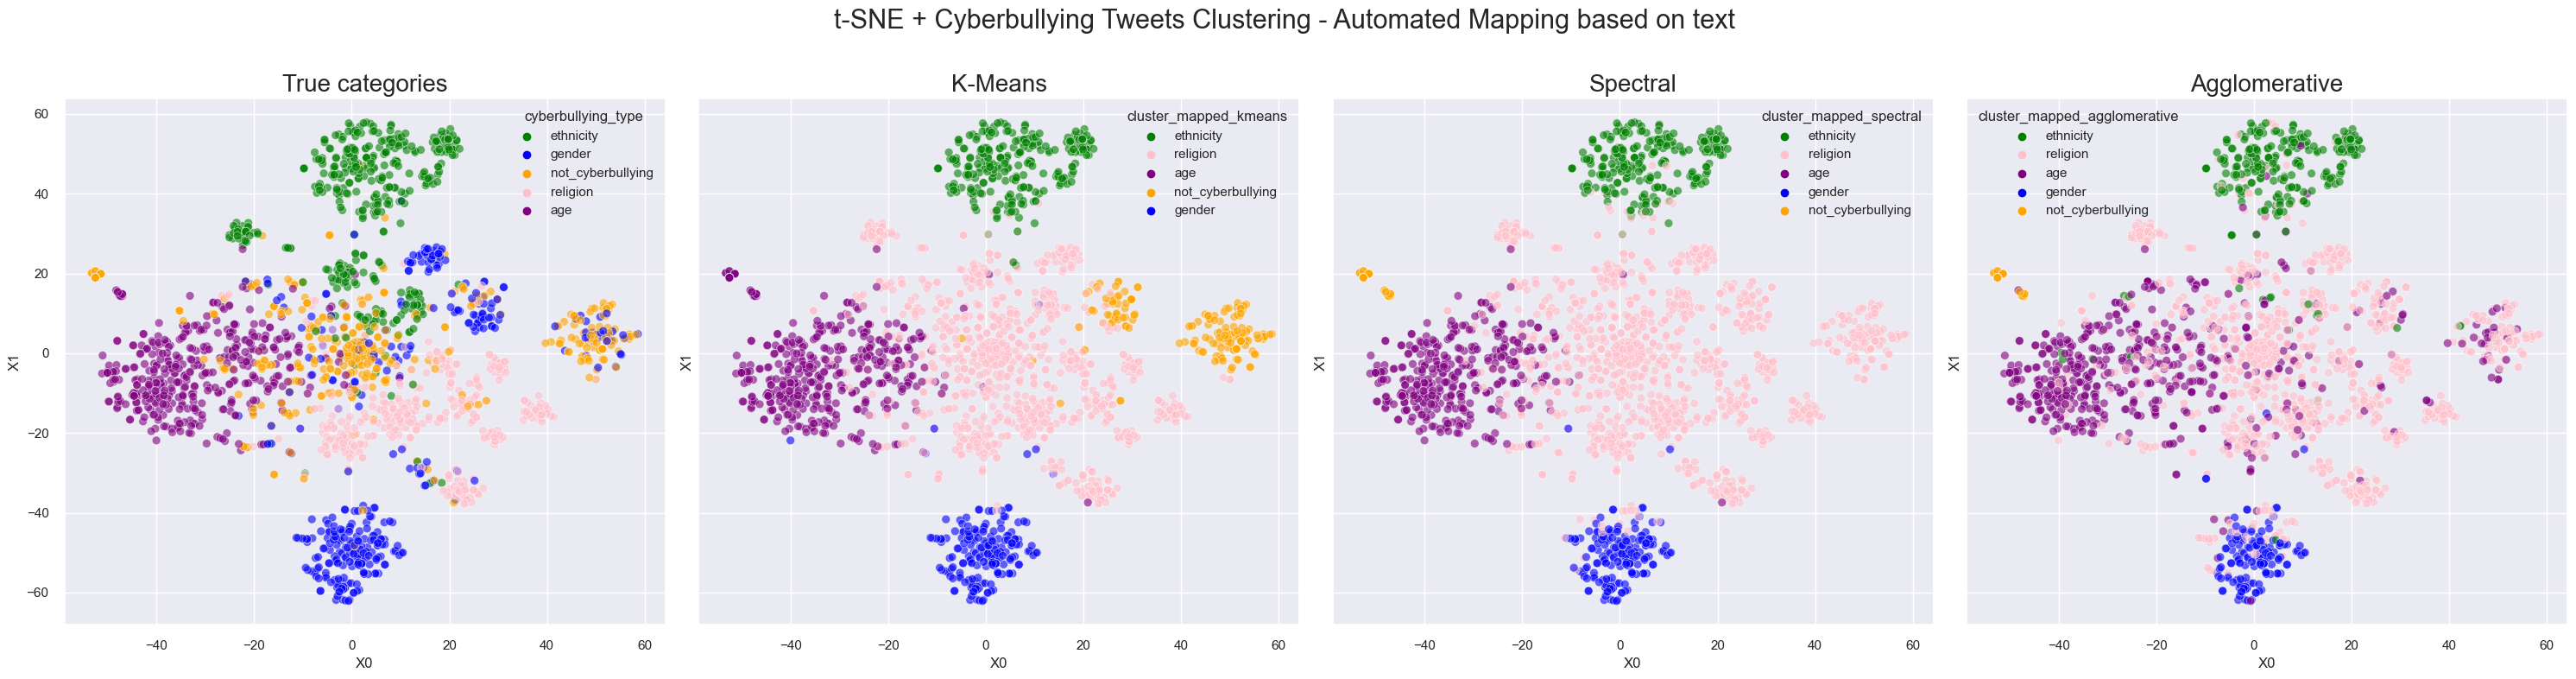

In [65]:
slice_df['tsne-2d-one'] = X_embedded[:, 0]
slice_df['tsne-2d-two'] = X_embedded[:, 1]

def plot_tnse_clusters_one_line(slice_df, method_names, cluster_mappings, X_embedded):
    fig, axes = plt.subplots(1, 4, figsize=(30, 8), sharex=True, sharey=True)
    fig.suptitle("t-SNE + Cyberbullying Tweets Clustering - Automated Mapping based on text ", fontsize=22)

    for i, (method_name, cluster_mapping) in enumerate(zip(method_names, cluster_mappings)):
        ax = axes[i]
        ax.set_title(f"{method_name}", fontsize=20)
        ax.set_xlabel("X0", fontsize=12)
        ax.set_ylabel("X1", fontsize=12)


        sns.scatterplot(
            x=X_embedded[:, 0],
            y=X_embedded[:, 1],
            hue=slice_df[cluster_mapping],
            palette=category_colors,  # Using the distinct color palette
            alpha=0.6,
            edgecolor='w',
            linewidth=0.5,
            s=50,
            ax=ax,
            legend=True  # Suppress individual legends in subplots
        )

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


# Usage
method_names = ["True categories", 'K-Means', 'Spectral', 'Agglomerative']
cluster_mappings = ['cyberbullying_type','cluster_mapped_kmeans', 'cluster_mapped_spectral', 'cluster_mapped_agglomerative']

plot_tnse_clusters_one_line(slice_df, method_names, cluster_mappings, X_embedded)



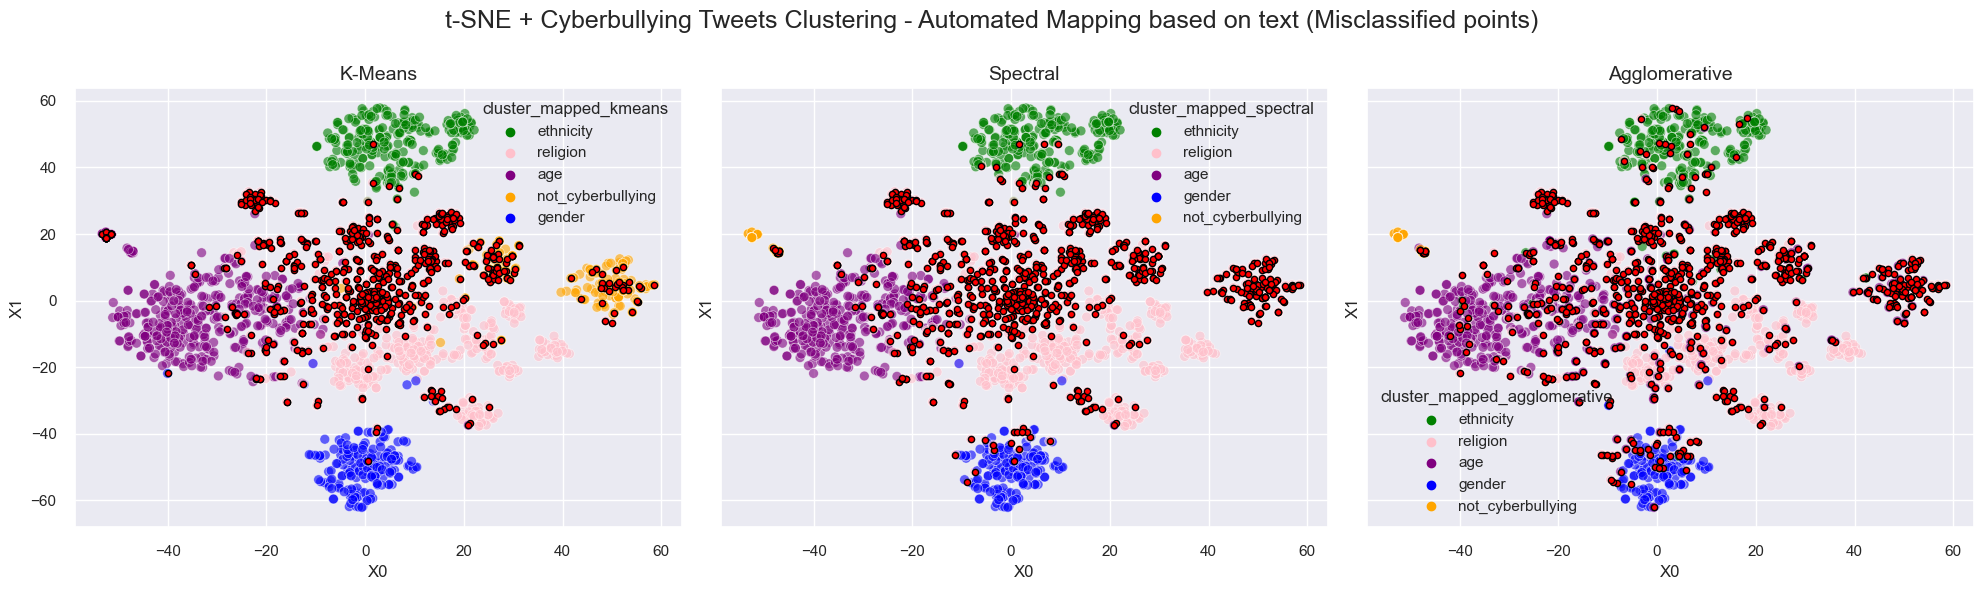

In [66]:
# Find misclassified indexes for KMeans
misclassified_kmeans = slice_df[slice_df['cyberbullying_type'] != slice_df['cluster_mapped_kmeans']]

# Find misclassified indexes for Spectral
misclassified_spectral = slice_df[slice_df['cyberbullying_type'] != slice_df['cluster_mapped_spectral']]

# Find misclassified indexes for Agglomerative
misclassified_agglo = slice_df[slice_df['cyberbullying_type'] != slice_df['cluster_mapped_agglomerative']]

def plot_tnse_clusters_with_misclassified(slice_df, method_names, cluster_mappings, X_embedded):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)
    fig.suptitle("t-SNE + Cyberbullying Tweets Clustering - Automated Mapping based on text (Misclassified points)", fontsize=18)

    misclassified_points = [misclassified_kmeans, misclassified_spectral, misclassified_agglo]

    for i, (method_name, cluster_mapping, misclassified) in enumerate(zip(method_names, cluster_mappings, misclassified_points)):
        ax = axes[i]
        ax.set_title(f"{method_name}", fontsize=14)
        ax.set_xlabel("X0", fontsize=12)
        ax.set_ylabel("X1", fontsize=12)

        # Plot all points
        sns.scatterplot(
            x=X_embedded[:, 0],
            y=X_embedded[:, 1],
            hue=slice_df[cluster_mapping],
            palette=category_colors,
            alpha=0.6,
            edgecolor='w',
            linewidth=0.5,
            s=50,
            ax=ax,
            legend=True
        )

        # Plot misclassified points with a red circle
        ax.scatter(
            misclassified['tsne-2d-one'],
            misclassified['tsne-2d-two'],
            s=20,  # Larger size for distinct visibility
            c='red',
            edgecolor='black',  # Black border around red circle
            label='Misclassified'
        )

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Usage
method_names = ['K-Means', 'Spectral', 'Agglomerative']
cluster_mappings = ['cluster_mapped_kmeans', 'cluster_mapped_spectral', 'cluster_mapped_agglomerative']

plot_tnse_clusters_with_misclassified(slice_df, method_names, cluster_mappings, X_embedded)

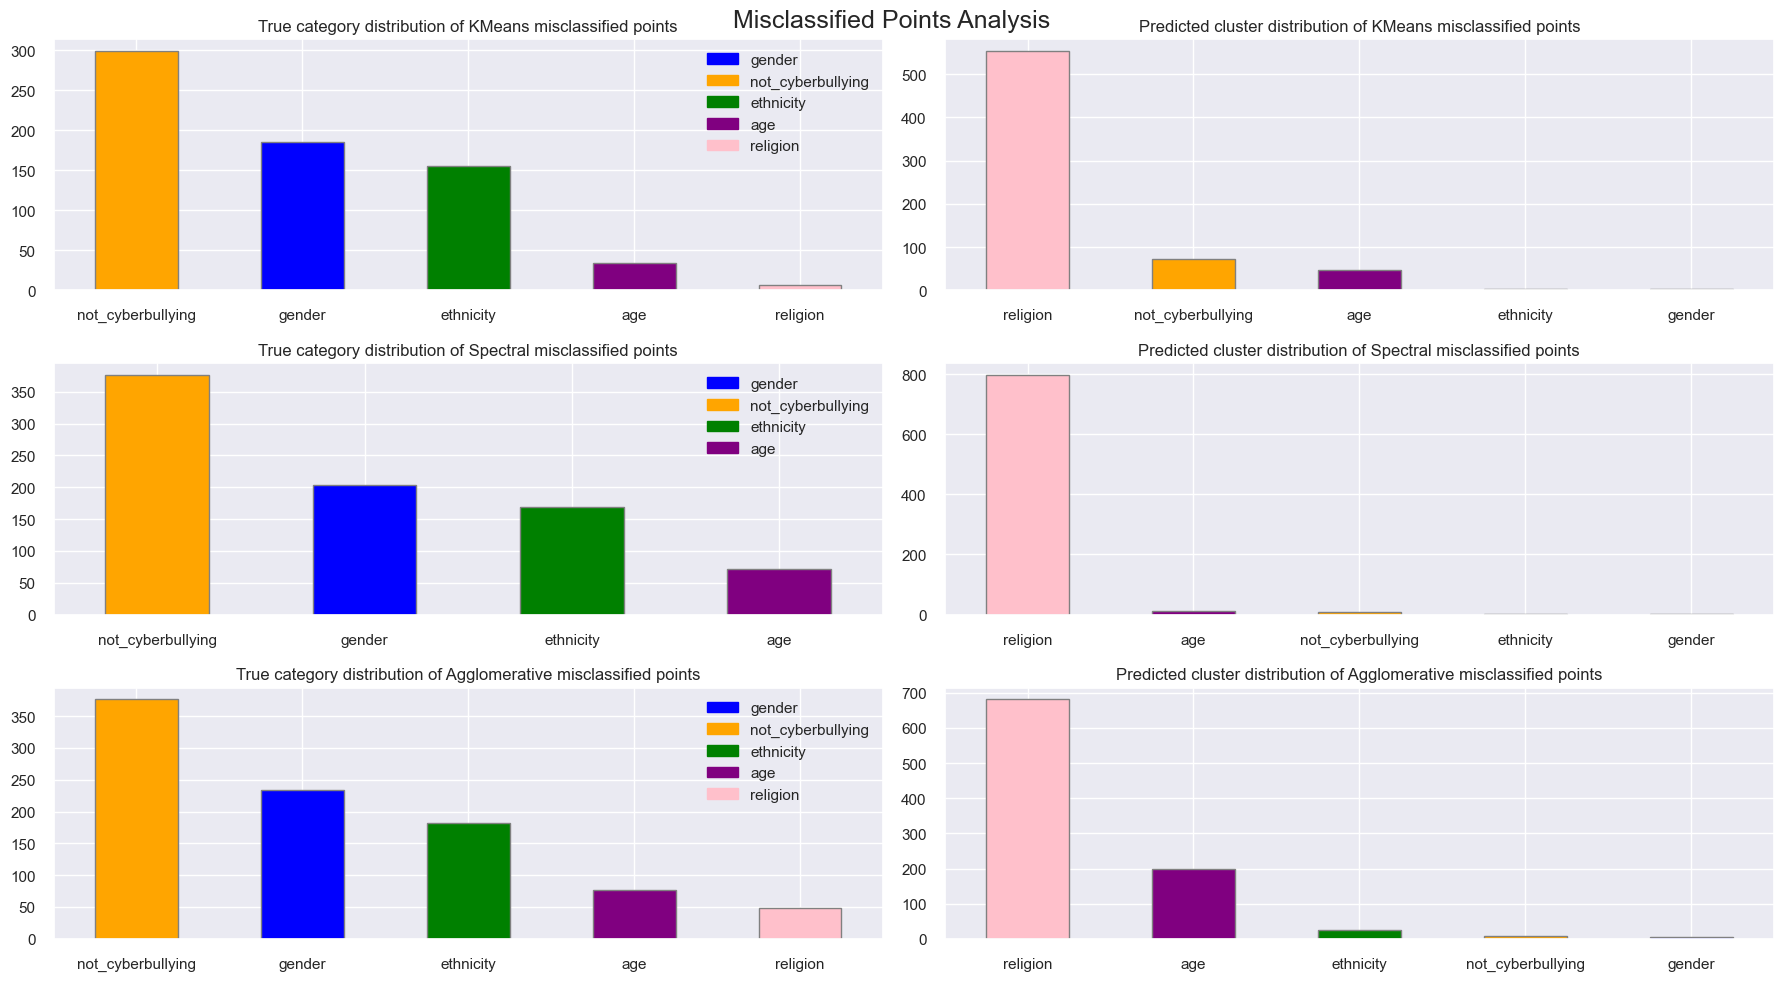

In [67]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
fig.suptitle('Misclassified Points Analysis', fontsize=18)

misclassified_points = [misclassified_kmeans, misclassified_spectral, misclassified_agglo]

for i, (misclassified, method_name) in enumerate(zip(misclassified_points, ['KMeans', 'Spectral', 'Agglomerative'])):
    # Distribution of misclassified points - true category
    misclassified['cyberbullying_type'].value_counts().plot(ax=axes[i, 0],
                                       kind='bar',
                                       rot=0,
                                       color=[category_colors[label] for label in misclassified['cyberbullying_type'].value_counts().index],
                                       edgecolor=["gray"],
                                       title=f'True category distribution of {method_name} misclassified points')

    # Distribution of misclassified points - predicted cluster
    misclassified['cluster_mapped_' + method_name.lower()].value_counts().plot(ax=axes[i, 1],
                                       kind='bar',
                                       rot=0,
                                       color=[category_colors[label] for label in misclassified['cluster_mapped_' + method_name.lower()].value_counts().index],
                                       edgecolor=["gray"],
                                       title=f'Predicted cluster distribution of {method_name} misclassified points')
    
    # Apply legend for the true category plot
    handles = [plt.Rectangle((0, 0), 1, 1, color=category_colors[label]) for label in misclassified['cyberbullying_type'].unique()]
    axes[i, 0].legend(handles, misclassified['cyberbullying_type'].unique(), loc='best')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


#  Sentiment Analysis by bullying category 🚩
The aim of this section is to flag the most "hateful" tweets according to the text information, both with the nltk sentiment analyzer and a more advanced method like BERT (transformer)

## NLTK Sentiment Analyzer

In [68]:
# Initialize VADER's SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get the VADER sentiment score
def get_vader_sentiment(tweet):
    return sid.polarity_scores(tweet)['compound']

# Apply VADER sentiment analysis to each correctly classified tweet
correctly_classified_kmeans['vader_sentiment_score'] = correctly_classified_kmeans['cleaned'].apply(get_vader_sentiment)

# Find the most negative tweet in each cluster among the correctly classified
most_negative_tweets_vader = {}

for cluster_label, cluster_name in cluster_map_kmeans.items():
    cluster_data = correctly_classified_kmeans[correctly_classified_kmeans['cluster_mapped_kmeans'] == cluster_name]
    if not cluster_data.empty:
        most_negative_tweet = cluster_data.loc[cluster_data['vader_sentiment_score'].idxmin()]
        most_negative_tweets_vader[cluster_name] = most_negative_tweet

# Create a list to display the results later
negative_tweet_info = []

# Display the most negative tweet for each cluster among the correctly classified
for cluster_name, tweet_data in most_negative_tweets_vader.items():
    negative_tweet_info.append({
        "Cluster": cluster_name,
        "Tweet": tweet_data['tweet_text'],
        "VADER Sentiment Score": tweet_data['vader_sentiment_score']
    })

negative_tweet_info

[{'Cluster': 'age',
  'Tweet': 'Angry! Under extreme marginalization and heavy family burden, nearly dead by nelsoncat production. While school assists HIM to hide the truth and harm me till March 2020. Till now, coordinating gang of public bully me. Bad intention will forecast the evil purpose of fake HKP',
  'VADER Sentiment Score': -0.981},
 {'Cluster': 'ethnicity',
  'Tweet': 'One more question for U? What if I were or for any of us out there that are biracial? Can we be racist? Or just half racist? Could we be victims of racism or would it only be half racism?! Do we blame our white half or do we blame our colored half? Racism is taught and learned!',
  'VADER Sentiment Score': -0.9803},
 {'Cluster': 'not_cyberbullying',
  'Tweet': "Don't fuck with me I fucking despise Kat and Andre fuck off #mkr",
  'VADER Sentiment Score': -0.9169},
 {'Cluster': 'gender',
  'Tweet': 'are you fucking stupid dude?',
  'VADER Sentiment Score': -0.7845}]

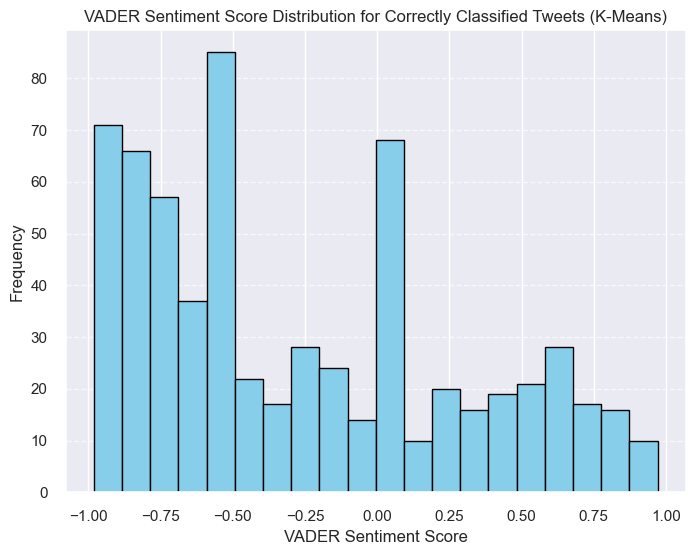

In [69]:
# Assuming you have the VADER sentiment scores for the tweets stored in a variable named 'vader_scores'
vader_scores = correctly_classified_kmeans['vader_sentiment_score']

# Plotting the sentiment score distribution
plt.figure(figsize=(8, 6))
plt.hist(vader_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('VADER Sentiment Score Distribution for Correctly Classified Tweets (K-Means)')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## BERT (Advanced Method)

In [54]:
classification = pipeline('sentiment-analysis', model = "bert-base-uncased")
type(classification)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

transformers.pipelines.text_classification.TextClassificationPipeline

In [55]:
# Since BERT uses it's own embeeding (positional embedding) and tokenization then we can apply the sentiment analysis directly to the text without cleaning 
texts = correctly_classified_kmeans['tweet_text'].to_list()
predictions = classification(texts)
predictions[:10]

[{'label': 'LABEL_1', 'score': 0.5385280847549438},
 {'label': 'LABEL_1', 'score': 0.6065319180488586},
 {'label': 'LABEL_1', 'score': 0.6045867800712585},
 {'label': 'LABEL_0', 'score': 0.5053238272666931},
 {'label': 'LABEL_1', 'score': 0.5340553522109985},
 {'label': 'LABEL_1', 'score': 0.5892233848571777},
 {'label': 'LABEL_1', 'score': 0.602604329586029},
 {'label': 'LABEL_1', 'score': 0.6373614072799683},
 {'label': 'LABEL_1', 'score': 0.6120082139968872},
 {'label': 'LABEL_1', 'score': 0.5990043878555298}]

In [56]:
correctly_classified_kmeans['sentiment_bert'] = [entry['score'] for entry in predictions]
correctly_classified_kmeans['label_bert'] = [entry['label'] for entry in predictions]
correctly_classified_kmeans.head(2)

index                                         tweet_text  \
5  41179  some dude keep sending me photos of himself bl...   
7  34714  No, it’s not only about the tweets, she bullie...   

  cyberbullying_type  word_count  \
5          ethnicity          46   
7                age          34   

                                             cleaned hashtags mentions emojis  \
5  dude keep send photo block wont anything creat...       []       []     []   
7  tweet bully black girl high school say didnt b...       []       []     []   

  language                                  combined_features  ...  \
5       en     dude keep send photo block wont anything cr...  ...   
7       en     tweet bully black girl high school say didn...  ...   

   cluster_mapped_kmeans  cluster_spectral cluster_mapped_spectral  \
5              ethnicity                 0                     age   
7                    age                 0                     age   

   cluster_agglo cluster_mapped_agglomerative  tsne-2d-one tsne-2d-two  \
5              0                    ethnicity    30.428053   21.591057   
7              3                          age    31.525995  -19.084341   

   vader_sentiment_score  sentiment_bert  label_bert  
5                -0.0444        0.538528     LABEL_1  
7                -0.8126        0.606532     LABEL_1  

[2 rows x 22 columns]

In [57]:
# Find the most negative tweet in each cluster among the correctly classified
most_negative_tweets_bert = {}

for cluster_label, cluster_name in cluster_map_kmeans.items():
    cluster_data = correctly_classified_kmeans[correctly_classified_kmeans['cluster_mapped_kmeans'] == cluster_name]
    if not cluster_data.empty:
        most_negative_tweet = cluster_data.loc[cluster_data['sentiment_bert'].idxmin()]
        most_negative_tweets_bert[cluster_name] = most_negative_tweet

# Create a list to display the results later
negative_tweet_info = []

# Display the most negative tweet for each cluster among the correctly classified
for cluster_name, tweet_data in most_negative_tweets_bert.items():
    negative_tweet_info.append({
        "Cluster": cluster_name,
        "Tweet": tweet_data['tweet_text'],
        "BERT Sentiment Score": tweet_data['sentiment_bert']
    })

negative_tweet_info

[{'Cluster': 'age',
  'Tweet': 'A kid that used to bully me in middle school commented on a pic I posted asking who could get me a hair look for my wedding saying “god”',
  'BERT Sentiment Score': 0.5006514191627502},
 {'Cluster': 'ethnicity',
  'Tweet': 'just wanna say ur one of the first ppl i followed n you’ve stayed consistent',
  'BERT Sentiment Score': 0.5010362863540649},
 {'Cluster': 'not_cyberbullying',
  'Tweet': 'RT @EloisePeace: remove the fucking hat at the table #MKR',
  'BERT Sentiment Score': 0.5119844079017639},
 {'Cluster': 'gender',
  'Tweet': 'are you fucking stupid dude?',
  'BERT Sentiment Score': 0.5808964371681213}]

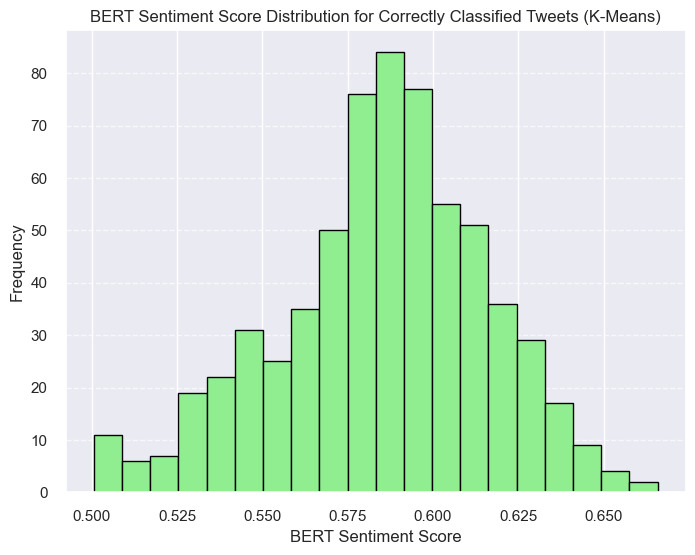

In [58]:
# Assuming you have the BERT sentiment scores for the tweets stored in a variable named 'bert_scores'
bert_scores = correctly_classified_kmeans['sentiment_bert']

# Plotting the sentiment score distribution for BERT
plt.figure(figsize=(8, 6))
plt.hist(bert_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title('BERT Sentiment Score Distribution for Correctly Classified Tweets (K-Means)')
plt.xlabel('BERT Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

